Read metadata into dataframe  - HubMAP_df

In [292]:
import pandas as pd
HubMAP_df = pd.read_csv("/content/drive/MyDrive/E583/client project/HuBMAP-20-dataset_information.csv")
import numpy as np

In [293]:
print (HubMAP_df)

        image_file  width_pixels  height_pixels anatomical_structures_segmention_file glomerulus_segmentation_file  patient_number                       race               ethnicity     sex  age  \
0   aa05346ff.tiff         47340          30720   aa05346ff-anatomical-structure.json               aa05346ff.json           67347                      White  Not Hispanic or Latino  Female   58   
1   afa5e8098.tiff         43780          36800   afa5e8098-anatomical-structure.json               afa5e8098.json           67347                      White  Not Hispanic or Latino  Female   58   
2   54f2eec69.tiff         22240          30440   54f2eec69-anatomical-structure.json               54f2eec69.json           67548  Black or African American  Not Hispanic or Latino    Male   58   
3   d488c759a.tiff         29020          46660   d488c759a-anatomical-structure.json               d488c759a.json           68138                      White  Not Hispanic or Latino  Female   66   
4   1e2425

# Statistical Data of Train and Test Data

# New Section

In [294]:
HubMAP_df.describe()

,width_pixels,height_pixels,patient_number,age,weight_kilograms,height_centimeters,bmi_kg/m^2,percent_cortex,percent_medulla
count,20.000000,20.000000,20.000000,20.000000,19.000000,19.000000,19.000000,20.000000,20.000000
mean,36776.850000,30264.350000,67312.300000,58.300000,82.494737,170.184211,28.436842,69.750000,30.250000
std,10928.838612,8023.868763,1064.197454,10.647955,17.806911,12.115338,5.135196,12.615258,12.615258
min,13013.000000,14844.000000,63921.000000,31.000000,59.000000,157.400000,22.000000,55.000000,0.000000
25%,28520.000000,26531.000000,67026.000000,55.250000,71.500000,160.000000,24.200000,55.000000,20.000000
50%,39714.500000,30999.000000,67347.000000,58.000000,79.900000,167.600000,27.700000,70.000000,30.000000
75%,44884.500000,35405.000000,68166.000000,66.000000,91.400000,180.950000,32.500000,80.000000,45.000000
max,50680.000000,46660.000000,68555.000000,76.000000,131.500000,193.000000,37.500000,100.000000,45.000000


# Categorical Data of Train and Test Data

In [295]:
pd.options.display.width = 200
categories = [	'race',	'ethnicity',		'sex', 'laterality', 'patient_number']
df_cats = pd.DataFrame()
initial = True
for category in categories:
  #print (list(HubMAP_df[category].value_counts().index))
  if initial:
    df_cats[category] = pd.DataFrame( list(HubMAP_df[category].value_counts().index))
    initial = False
  else:
    
    print (1)#, {category:HubMAP_df[category].value_counts().index})
    df_cats = pd.concat([df_cats, pd.DataFrame({category:HubMAP_df[category].value_counts().index})], axis=1)
  df_cats = pd.concat([df_cats, pd.DataFrame({category+'_count':HubMAP_df[category].value_counts().values})], axis=1)
  #df[category+'_count'] = list(HubMAP_df[category].value_counts().values)
  
df_cats.style.format(na_rep='')

1
1
1
1


,race,race_count,ethnicity,ethnicity_count,sex,sex_count,laterality,laterality_count,patient_number,patient_number_count
0,White,16.000000,Not Hispanic or Latino,20.000000,Female,10.000000,Right,10.000000,67347,3
1,Black or African American,4.000000,,,Male,10.000000,Left,10.000000,67548,2
2,,,,,,,,,67026,2
3,,,,,,,,,67112,2
4,,,,,,,,,68304,2
5,,,,,,,,,68555,2
6,,,,,,,,,66999,2
7,,,,,,,,,68138,1
8,,,,,,,,,63921,1
9,,,,,,,,,68250,1


Look at data with just training files


In [296]:
HubMAP_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 16 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   image_file                             20 non-null     object 
 1   width_pixels                           20 non-null     int64  
 2   height_pixels                          20 non-null     int64  
 3   anatomical_structures_segmention_file  20 non-null     object 
 4   glomerulus_segmentation_file           20 non-null     object 
 5   patient_number                         20 non-null     int64  
 6   race                                   20 non-null     object 
 7   ethnicity                              20 non-null     object 
 8   sex                                    20 non-null     object 
 9   age                                    20 non-null     int64  
 10  weight_kilograms                       19 non-null     float64
 11  height_c

In [297]:
HubMAP_df.nunique()

image_file                               20
width_pixels                             20
height_pixels                            19
anatomical_structures_segmention_file    20
glomerulus_segmentation_file             20
patient_number                           12
race                                      2
ethnicity                                 1
sex                                       2
age                                       9
weight_kilograms                         11
height_centimeters                        9
bmi_kg/m^2                               11
laterality                                2
percent_cortex                            5
percent_medulla                           5
dtype: int64

In [298]:
from collections import Counter
Counter(HubMAP_df[HubMAP_df.columns])

Counter({'image_file': 1,
         'width_pixels': 1,
         'height_pixels': 1,
         'anatomical_structures_segmention_file': 1,
         'glomerulus_segmentation_file': 1,
         'patient_number': 1,
         'race': 1,
         'ethnicity': 1,
         'sex': 1,
         'age': 1,
         'weight_kilograms': 1,
         'height_centimeters': 1,
         'bmi_kg/m^2': 1,
         'laterality': 1,
         'percent_cortex': 1,
         'percent_medulla': 1})

In [299]:

pd.Series({c: HubMAP_df[c].unique() for c in HubMAP_df})

image_file                               [aa05346ff.tiff, afa5e8098.tiff, 54f2eec69.tif...
width_pixels                             [47340, 43780, 22240, 29020, 32220, 27020, 497...
height_pixels                            [30720, 36800, 30440, 46660, 26780, 16180, 268...
anatomical_structures_segmention_file    [aa05346ff-anatomical-structure.json, afa5e809...
glomerulus_segmentation_file             [aa05346ff.json, afa5e8098.json, 54f2eec69.jso...
patient_number                           [67347, 67548, 68138, 63921, 67026, 67112, 682...
race                                                    [White, Black or African American]
ethnicity                                                         [Not Hispanic or Latino]
sex                                                                         [Female, Male]
age                                                   [58, 66, 48, 53, 56, 44, 76, 73, 31]
weight_kilograms                         [59.0, 79.9, 81.5, 131.5, 73.0, 91.2, 71.7, 71...

Data will be in columns so take Transpose - HubMAP_dfT

In [300]:
HubMAP_dfT = HubMAP_df.T
HubMAP_dfT

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
image_file,aa05346ff.tiff,afa5e8098.tiff,54f2eec69.tiff,d488c759a.tiff,1e2425f28.tiff,e79de561c.tiff,c68fe75ea.tiff,095bf7a1f.tiff,26dc41664.tiff,57512b7f1.tiff,4ef6695ce.tiff,aaa6a05cc.tiff,b9a3865fc.tiff,cb2d976f4.tiff,b2dc8411c.tiff,2ec3f1bb9.tiff,0486052bb.tiff,3589adb90.tiff,2f6ecfcdf.tiff,8242609fa.tiff
width_pixels,47340,43780,22240,29020,32220,27020,49780,39000,42360,43160,50680,13013,40429,49548,31262,47723,34937,22165,25794,44066
height_pixels,30720,36800,30440,46660,26780,16180,26840,38160,38160,33240,39960,18484,31295,34940,14844,23990,25784,29433,31278,31299
anatomical_structures_segmention_file,aa05346ff-anatomical-structure.json,afa5e8098-anatomical-structure.json,54f2eec69-anatomical-structure.json,d488c759a-anatomical-structure.json,1e2425f28-anatomical-structure.json,e79de561c-anatomical-structure.json,c68fe75ea-anatomical-structure.json,095bf7a1f-anatomical-structure.json,26dc41664-anatomical-structure.json,57512b7f1-anatomical-structure.json,4ef6695ce-anatomical-structure.json,aaa6a05cc-anatomical-structure.json,b9a3865fc-anatomical-structure.json,cb2d976f4-anatomical-structure.json,b2dc8411c-anatomical-structure.json,2ec3f1bb9-anatomical-structure.json,0486052bb-anatomical-structure.json,3589adb90-anatomical-structure.json,2f6ecfcdf-anatomical-structure.json,8242609fa-anatomical-structure.json
glomerulus_segmentation_file,aa05346ff.json,afa5e8098.json,54f2eec69.json,d488c759a.json,1e2425f28.json,e79de561c.json,c68fe75ea.json,095bf7a1f.json,26dc41664.json,57512b7f1.json,4ef6695ce.json,aaa6a05cc.json,b9a3865fc.json,cb2d976f4.json,b2dc8411c.json,2ec3f1bb9.json,0486052bb.json,3589adb90.json,2f6ecfcdf.json,8242609fa.json
patient_number,67347,67347,67548,68138,63921,67026,67112,68250,68304,68555,66999,65631,67347,67548,67026,67112,67177,68304,68555,66999
race,White,White,Black or African American,White,White,Black or African American,White,White,White,White,White,White,White,Black or African American,Black or African American,White,White,White,White,White
ethnicity,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino
sex,Female,Female,Male,Female,Male,Male,Male,Female,Female,Female,Male,Female,Female,Male,Male,Male,Male,Female,Female,Male
age,58,58,58,66,48,53,56,44,66,76,56,73,58,58,53,56,31,66,76,56


Add row to identify traning files - train (train=1, test=0) 

In [301]:
HubMAP_dfT.loc['train'] = [0,1,1,0,1,1,1,1,1,0,1,1,1,1,1,0,1,0,1,1]

HubMAP_dfT
 

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
image_file,aa05346ff.tiff,afa5e8098.tiff,54f2eec69.tiff,d488c759a.tiff,1e2425f28.tiff,e79de561c.tiff,c68fe75ea.tiff,095bf7a1f.tiff,26dc41664.tiff,57512b7f1.tiff,4ef6695ce.tiff,aaa6a05cc.tiff,b9a3865fc.tiff,cb2d976f4.tiff,b2dc8411c.tiff,2ec3f1bb9.tiff,0486052bb.tiff,3589adb90.tiff,2f6ecfcdf.tiff,8242609fa.tiff
width_pixels,47340,43780,22240,29020,32220,27020,49780,39000,42360,43160,50680,13013,40429,49548,31262,47723,34937,22165,25794,44066
height_pixels,30720,36800,30440,46660,26780,16180,26840,38160,38160,33240,39960,18484,31295,34940,14844,23990,25784,29433,31278,31299
anatomical_structures_segmention_file,aa05346ff-anatomical-structure.json,afa5e8098-anatomical-structure.json,54f2eec69-anatomical-structure.json,d488c759a-anatomical-structure.json,1e2425f28-anatomical-structure.json,e79de561c-anatomical-structure.json,c68fe75ea-anatomical-structure.json,095bf7a1f-anatomical-structure.json,26dc41664-anatomical-structure.json,57512b7f1-anatomical-structure.json,4ef6695ce-anatomical-structure.json,aaa6a05cc-anatomical-structure.json,b9a3865fc-anatomical-structure.json,cb2d976f4-anatomical-structure.json,b2dc8411c-anatomical-structure.json,2ec3f1bb9-anatomical-structure.json,0486052bb-anatomical-structure.json,3589adb90-anatomical-structure.json,2f6ecfcdf-anatomical-structure.json,8242609fa-anatomical-structure.json
glomerulus_segmentation_file,aa05346ff.json,afa5e8098.json,54f2eec69.json,d488c759a.json,1e2425f28.json,e79de561c.json,c68fe75ea.json,095bf7a1f.json,26dc41664.json,57512b7f1.json,4ef6695ce.json,aaa6a05cc.json,b9a3865fc.json,cb2d976f4.json,b2dc8411c.json,2ec3f1bb9.json,0486052bb.json,3589adb90.json,2f6ecfcdf.json,8242609fa.json
patient_number,67347,67347,67548,68138,63921,67026,67112,68250,68304,68555,66999,65631,67347,67548,67026,67112,67177,68304,68555,66999
race,White,White,Black or African American,White,White,Black or African American,White,White,White,White,White,White,White,Black or African American,Black or African American,White,White,White,White,White
ethnicity,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino
sex,Female,Female,Male,Female,Male,Male,Male,Female,Female,Female,Male,Female,Female,Male,Male,Male,Male,Female,Female,Male
age,58,58,58,66,48,53,56,44,66,76,56,73,58,58,53,56,31,66,76,56


Create new data frame with just train data - HubMAP_train_df

In [302]:
row = 'train'                                                                                                                                                                                     
train = 1                                                                                                                                                                                  
list_col = [c for c in HubMAP_dfT.columns if HubMAP_dfT[c][row] == train]                                                                                                                                   
HubMAP_train_df = HubMAP_dfT[list_col]                                                                                                                                                                  
HubMAP_train_df

,1,2,4,5,6,7,8,10,11,12,13,14,16,18,19
image_file,afa5e8098.tiff,54f2eec69.tiff,1e2425f28.tiff,e79de561c.tiff,c68fe75ea.tiff,095bf7a1f.tiff,26dc41664.tiff,4ef6695ce.tiff,aaa6a05cc.tiff,b9a3865fc.tiff,cb2d976f4.tiff,b2dc8411c.tiff,0486052bb.tiff,2f6ecfcdf.tiff,8242609fa.tiff
width_pixels,43780,22240,32220,27020,49780,39000,42360,50680,13013,40429,49548,31262,34937,25794,44066
height_pixels,36800,30440,26780,16180,26840,38160,38160,39960,18484,31295,34940,14844,25784,31278,31299
anatomical_structures_segmention_file,afa5e8098-anatomical-structure.json,54f2eec69-anatomical-structure.json,1e2425f28-anatomical-structure.json,e79de561c-anatomical-structure.json,c68fe75ea-anatomical-structure.json,095bf7a1f-anatomical-structure.json,26dc41664-anatomical-structure.json,4ef6695ce-anatomical-structure.json,aaa6a05cc-anatomical-structure.json,b9a3865fc-anatomical-structure.json,cb2d976f4-anatomical-structure.json,b2dc8411c-anatomical-structure.json,0486052bb-anatomical-structure.json,2f6ecfcdf-anatomical-structure.json,8242609fa-anatomical-structure.json
glomerulus_segmentation_file,afa5e8098.json,54f2eec69.json,1e2425f28.json,e79de561c.json,c68fe75ea.json,095bf7a1f.json,26dc41664.json,4ef6695ce.json,aaa6a05cc.json,b9a3865fc.json,cb2d976f4.json,b2dc8411c.json,0486052bb.json,2f6ecfcdf.json,8242609fa.json
patient_number,67347,67548,63921,67026,67112,68250,68304,66999,65631,67347,67548,67026,67177,68555,66999
race,White,Black or African American,White,Black or African American,White,White,White,White,White,White,Black or African American,Black or African American,White,White,White
ethnicity,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino
sex,Female,Male,Male,Male,Male,Female,Female,Male,Female,Female,Male,Male,Male,Female,Male
age,58,58,48,53,56,44,66,56,73,58,58,53,31,76,56


# Look at Training Data
Transpose to look at patient data


In [303]:
HubMAP_train_dfT = HubMAP_train_df.T
HubMAP_train_dfT

,image_file,width_pixels,height_pixels,anatomical_structures_segmention_file,glomerulus_segmentation_file,patient_number,race,ethnicity,sex,age,weight_kilograms,height_centimeters,bmi_kg/m^2,laterality,percent_cortex,percent_medulla,train
1,afa5e8098.tiff,43780,36800,afa5e8098-anatomical-structure.json,afa5e8098.json,67347,White,Not Hispanic or Latino,Female,58,59.0,160.0,23.0,Right,55,45,1
2,54f2eec69.tiff,22240,30440,54f2eec69-anatomical-structure.json,54f2eec69.json,67548,Black or African American,Not Hispanic or Latino,Male,58,79.9,190.5,22.0,Right,75,25,1
4,1e2425f28.tiff,32220,26780,1e2425f28-anatomical-structure.json,1e2425f28.json,63921,White,Not Hispanic or Latino,Male,48,131.5,193.0,35.3,Right,65,35,1
5,e79de561c.tiff,27020,16180,e79de561c-anatomical-structure.json,e79de561c.json,67026,Black or African American,Not Hispanic or Latino,Male,53,73.0,166.0,26.5,Left,55,45,1
6,c68fe75ea.tiff,49780,26840,c68fe75ea-anatomical-structure.json,c68fe75ea.json,67112,White,Not Hispanic or Latino,Male,56,91.2,167.6,32.5,Left,80,20,1
7,095bf7a1f.tiff,39000,38160,095bf7a1f-anatomical-structure.json,095bf7a1f.json,68250,White,Not Hispanic or Latino,Female,44,71.7,160.0,28.0,Right,65,35,1
8,26dc41664.tiff,42360,38160,26dc41664-anatomical-structure.json,26dc41664.json,68304,White,Not Hispanic or Latino,Female,66,71.3,167.6,25.4,Left,55,45,1
10,4ef6695ce.tiff,50680,39960,4ef6695ce-anatomical-structure.json,4ef6695ce.json,66999,White,Not Hispanic or Latino,Male,56,91.4,181.6,27.7,Right,65,35,1
11,aaa6a05cc.tiff,13013,18484,aaa6a05cc-anatomical-structure.json,aaa6a05cc.json,65631,White,Not Hispanic or Latino,Female,73,NaN,NaN,NaN,Left,75,25,1
12,b9a3865fc.tiff,40429,31295,b9a3865fc-anatomical-structure.json,b9a3865fc.json,67347,White,Not Hispanic or Latino,Female,58,59.0,160.0,23.0,Right,55,45,1


In [304]:
# Categorical Data of Train and Test Data

# Statistical Data of Training Only Data

# New Section

In [305]:
HubMAP_train_dfT.describe()

,image_file,width_pixels,height_pixels,anatomical_structures_segmention_file,glomerulus_segmentation_file,patient_number,race,ethnicity,sex,age,weight_kilograms,height_centimeters,bmi_kg/m^2,laterality,percent_cortex,percent_medulla,train
count,15,15,15,15,15,15,15,15,15,15,14.0,14.0,14.0,15,15,15,15
unique,15,15,14,15,15,11,2,1,2,9,10.0,8.0,10.0,2,4,4,1
top,afa5e8098.tiff,43780,38160,afa5e8098-anatomical-structure.json,afa5e8098.json,67347,White,Not Hispanic or Latino,Male,58,59.0,160.0,23.0,Right,55,45,1
freq,1,1,2,1,1,2,11,15,9,4,2.0,3.0,2.0,9,5,5,15


In [306]:
numeric_list =['width_pixels', 'height_pixels', 'weight_kilograms', 'height_centimeters', 'bmi_kg/m^2', 'percent_cortex', 'percent_medulla']
HubMAP_train_dfT[numeric_list].astype(float).describe()

,width_pixels,height_pixels,weight_kilograms,height_centimeters,bmi_kg/m^2,percent_cortex,percent_medulla
count,15.000000,15.000000,14.000000,14.000000,14.000000,15.000000,15.000000
mean,36408.600000,29416.266667,83.671429,173.007143,27.835714,66.666667,33.333333
std,11088.922431,7993.480330,19.262775,12.771330,4.945955,10.118347,10.118347
min,13013.000000,14844.000000,59.000000,157.400000,22.000000,55.000000,20.000000
25%,29141.000000,26282.000000,72.025000,161.500000,23.600000,55.000000,25.000000
50%,39000.000000,31278.000000,79.900000,167.600000,27.100000,65.000000,35.000000
75%,43923.000000,35870.000000,91.400000,181.600000,31.375000,75.000000,45.000000
max,50680.000000,39960.000000,131.500000,193.000000,37.500000,80.000000,45.000000


# Categorical Data of Train Only Data

In [307]:
pd.options.display.width = 200
#print (HubMAP_train_dfT)
categories = [	'race',	'ethnicity',		'sex', 'laterality', 'patient_number']
dftrain_cats = pd.DataFrame()
initial = True
for category in categories:
  #print (list(HubMAP_train_dfT[category].value_counts().index))
  if initial:
    dftrain_cats[category] = pd.DataFrame( list(HubMAP_train_dfT[category].value_counts().index))
    initial = False
  else:
    
    #print (1)#, {category:HubMAP_df[category].value_counts().index})
    dftrain_cats = pd.concat([dftrain_cats, pd.DataFrame({category:HubMAP_train_dfT[category].value_counts().index})], axis=1)
  dftrain_cats = pd.concat([dftrain_cats, pd.DataFrame({category+'_count':HubMAP_train_dfT[category].value_counts().values})], axis=1)
  #df[category+'_count'] = list(HubMAP_df[category].value_counts().values)
  
dftrain_cats.style.format(na_rep='')

,race,race_count,ethnicity,ethnicity_count,sex,sex_count,laterality,laterality_count,patient_number,patient_number_count
0,White,11.000000,Not Hispanic or Latino,15.000000,Male,9.000000,Right,9.000000,67347,2
1,Black or African American,4.000000,,,Female,6.000000,Left,6.000000,67548,2
2,,,,,,,,,67026,2
3,,,,,,,,,66999,2
4,,,,,,,,,63921,1
5,,,,,,,,,67112,1
6,,,,,,,,,68250,1
7,,,,,,,,,68304,1
8,,,,,,,,,65631,1
9,,,,,,,,,67177,1


Look at data with just training files


In [308]:
HubMAP_train_dfT.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 1 to 19
Data columns (total 17 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   image_file                             15 non-null     object
 1   width_pixels                           15 non-null     object
 2   height_pixels                          15 non-null     object
 3   anatomical_structures_segmention_file  15 non-null     object
 4   glomerulus_segmentation_file           15 non-null     object
 5   patient_number                         15 non-null     object
 6   race                                   15 non-null     object
 7   ethnicity                              15 non-null     object
 8   sex                                    15 non-null     object
 9   age                                    15 non-null     object
 10  weight_kilograms                       14 non-null     object
 11  height_centimeters   

In [309]:
HubMAP_train_dfT.nunique()

image_file                               15
width_pixels                             15
height_pixels                            14
anatomical_structures_segmention_file    15
glomerulus_segmentation_file             15
patient_number                           11
race                                      2
ethnicity                                 1
sex                                       2
age                                       9
weight_kilograms                         10
height_centimeters                        8
bmi_kg/m^2                               10
laterality                                2
percent_cortex                            4
percent_medulla                           4
train                                     1
dtype: int64

In [310]:
from collections import Counter
Counter(HubMAP_train_dfT[HubMAP_train_dfT.columns])

Counter({'image_file': 1,
         'width_pixels': 1,
         'height_pixels': 1,
         'anatomical_structures_segmention_file': 1,
         'glomerulus_segmentation_file': 1,
         'patient_number': 1,
         'race': 1,
         'ethnicity': 1,
         'sex': 1,
         'age': 1,
         'weight_kilograms': 1,
         'height_centimeters': 1,
         'bmi_kg/m^2': 1,
         'laterality': 1,
         'percent_cortex': 1,
         'percent_medulla': 1,
         'train': 1})

In [311]:

pd.Series({c: HubMAP_train_dfT[c].unique() for c in HubMAP_train_dfT})

image_file                               [afa5e8098.tiff, 54f2eec69.tiff, 1e2425f28.tif...
width_pixels                             [43780, 22240, 32220, 27020, 49780, 39000, 423...
height_pixels                            [36800, 30440, 26780, 16180, 26840, 38160, 399...
anatomical_structures_segmention_file    [afa5e8098-anatomical-structure.json, 54f2eec6...
glomerulus_segmentation_file             [afa5e8098.json, 54f2eec69.json, 1e2425f28.jso...
patient_number                           [67347, 67548, 63921, 67026, 67112, 68250, 683...
race                                                    [White, Black or African American]
ethnicity                                                         [Not Hispanic or Latino]
sex                                                                         [Female, Male]
age                                                   [58, 48, 53, 56, 44, 66, 73, 31, 76]
weight_kilograms                         [59.0, 79.9, 131.5, 73.0, 91.2, 71.7, 71.3, 91...

Read glomerular sizes into dataframe - glom_sizes_df (square pixels)

In [312]:
glom_sizes_df = pd.read_csv("/content/drive/MyDrive/E583/client project/Glomerulus_sizes_json.csv")
glom_sizes_df

,0486052bb.json,095bf7a1f.json,1e2425f28.json,26dc41664.json,2f6ecfcdf.json,4ef6695ce.json,54f2eec69.json,8242609fa.json,aaa6a05cc.json,afa5e8098.json,b2dc8411c.json,b9a3865fc.json,c68fe75ea.json,cb2d976f4.json,e79de561c.json
0,92495.85,166626.41,100975.03,119807.92,72803.00,117008.73,139469.5,42312.00,36588.00,49982.18,71078.86,33597.36,182508.00,85520.83,89366.50
1,97046.00,172300.25,94381.00,123149.68,24871.00,55103.17,50652.6,86092.81,46380.47,130740.00,36177.50,42361.50,126266.50,81845.50,104452.50
2,100391.51,126999.03,146586.50,104433.08,67299.00,83655.24,148141.0,64586.50,46168.00,77336.79,54531.50,17669.50,65007.57,56065.97,76934.50
3,69348.50,137302.25,119532.99,63190.50,44957.78,122856.49,175314.5,76688.50,47832.00,56880.00,36025.00,57560.50,129383.50,72586.50,126767.50
4,31571.50,109319.13,98462.00,98568.42,61439.41,119859.69,91399.5,60042.14,47591.50,46132.22,27378.50,69841.50,137909.50,42936.72,95576.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46359.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
582,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80269.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
583,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68462.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
584,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67513.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Convert to square micrometers
1 pixel = 0.5 micrometers, 1 square pixel = 0.25 sq micrometers
expected diameter is 100-350 micrometers, gives areas 7835-96211 sq micrometers
areas would typically be smaller because of slicing spherical bodies 

In [313]:
glom_sizes_df = glom_sizes_df*0.25
glom_sizes_df


,0486052bb.json,095bf7a1f.json,1e2425f28.json,26dc41664.json,2f6ecfcdf.json,4ef6695ce.json,54f2eec69.json,8242609fa.json,aaa6a05cc.json,afa5e8098.json,b2dc8411c.json,b9a3865fc.json,c68fe75ea.json,cb2d976f4.json,e79de561c.json
0,23123.9625,41656.6025,25243.7575,29951.980,18200.7500,29252.1825,34867.375,10578.0000,9147.0000,12495.5450,17769.715,8399.340,45627.0000,21380.2075,22341.6250
1,24261.5000,43075.0625,23595.2500,30787.420,6217.7500,13775.7925,12663.150,21523.2025,11595.1175,32685.0000,9044.375,10590.375,31566.6250,20461.3750,26113.1250
2,25097.8775,31749.7575,36646.6250,26108.270,16824.7500,20913.8100,37035.250,16146.6250,11542.0000,19334.1975,13632.875,4417.375,16251.8925,14016.4925,19233.6250
3,17337.1250,34325.5625,29883.2475,15797.625,11239.4450,30714.1225,43828.625,19172.1250,11958.0000,14220.0000,9006.250,14390.125,32345.8750,18146.6250,31691.8750
4,7892.8750,27329.7825,24615.5000,24642.105,15359.8525,29964.9225,22849.875,15010.5350,11897.8750,11533.0550,6844.625,17460.375,34477.3750,10734.1800,23894.1125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11589.8750,NaN,NaN,NaN,NaN,NaN,NaN,NaN
582,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20067.3750,NaN,NaN,NaN,NaN,NaN,NaN,NaN
583,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17115.5000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
584,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16878.2500,NaN,NaN,NaN,NaN,NaN,NaN,NaN


create stats on sizes in dataframe - size_stats

In [314]:
size_stats = glom_sizes_df.describe()
size_stats

,0486052bb.json,095bf7a1f.json,1e2425f28.json,26dc41664.json,2f6ecfcdf.json,4ef6695ce.json,54f2eec69.json,8242609fa.json,aaa6a05cc.json,afa5e8098.json,b2dc8411c.json,b9a3865fc.json,c68fe75ea.json,cb2d976f4.json,e79de561c.json
count,130.000000,350.000000,178.000000,245.000000,160.000000,439.000000,139.000000,586.000000,99.000000,235.000000,138.000000,469.000000,118.000000,319.000000,180.000000
mean,18331.233808,24854.918607,26214.235126,26441.030367,12455.111000,25405.007494,25464.973112,13800.462172,10835.106490,28261.677000,11057.523986,14080.526626,27664.227945,19703.568934,22025.156597
std,7764.959821,8658.895469,8645.106951,8500.021677,4755.947201,8400.255610,9152.580108,4596.448052,3326.574865,10115.120187,3740.337521,4581.964694,10434.561430,7824.012220,7401.815843
min,2847.465000,4634.905000,8379.007500,6717.680000,1937.065000,5686.265000,6065.000000,2488.302500,4189.250000,6919.875000,3592.250000,3219.605000,5744.375000,3940.327500,6597.265000
25%,13534.000000,18797.203750,19316.860000,21317.755000,8937.692500,19845.886250,18157.125000,10266.221875,8289.340000,21032.863750,8290.187500,10801.625000,19739.593750,13981.308750,17035.127500
50%,19534.500000,25123.506250,26965.628750,26949.625000,12941.750000,26691.052500,25965.782500,13965.116250,10759.125000,27845.937500,11272.697500,14402.115000,26260.750000,19554.875000,21696.586250
75%,23772.031250,30495.093750,33114.593750,31911.097500,16133.022500,31061.500000,32085.125000,17126.592500,12899.062500,35936.683750,13792.843750,17400.250000,34820.783125,25532.858750,26721.343750
max,47339.225000,49550.875000,46043.492500,50494.750000,23677.612500,50575.375000,51756.240000,27888.457500,22365.375000,56604.490000,19883.750000,31869.742500,59188.625000,38373.250000,54760.800000


Read glomerular eccentricities into dataframe - glom_ecc_df

In [315]:
glom_ecc_df = pd.read_csv("/content/drive/MyDrive/E583/client project/Glomerulus_eccentricities_json.csv")
glom_ecc_df

,0486052bb.json,095bf7a1f.json,1e2425f28.json,26dc41664.json,2f6ecfcdf.json,4ef6695ce.json,54f2eec69.json,8242609fa.json,aaa6a05cc.json,afa5e8098.json,b2dc8411c.json,b9a3865fc.json,c68fe75ea.json,cb2d976f4.json,e79de561c.json
0,0.61,0.37,0.73,0.69,0.57,0.30,0.52,0.49,0.36,0.66,0.38,0.34,0.56,0.51,0.77
1,0.53,0.20,0.54,0.14,0.76,0.50,0.22,0.60,0.58,0.12,0.22,0.44,0.52,0.66,0.35
2,0.52,0.24,0.55,0.55,0.69,0.53,0.28,0.62,0.61,0.68,0.40,0.22,0.89,0.69,0.22
3,0.63,0.31,0.39,0.30,0.74,0.62,0.42,0.53,0.49,0.37,0.36,0.40,0.48,0.54,0.53
4,0.62,0.57,0.51,0.30,0.64,0.51,0.29,0.44,0.52,0.43,0.52,0.67,0.42,0.23,0.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.29,NaN,NaN,NaN,NaN,NaN,NaN,NaN
582,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.59,NaN,NaN,NaN,NaN,NaN,NaN,NaN
583,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.66,NaN,NaN,NaN,NaN,NaN,NaN,NaN
584,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN


create stats on eccentricities in dataframe - ecc_stats

In [316]:
ecc_stats = glom_ecc_df.describe()
ecc_stats

,0486052bb.json,095bf7a1f.json,1e2425f28.json,26dc41664.json,2f6ecfcdf.json,4ef6695ce.json,54f2eec69.json,8242609fa.json,aaa6a05cc.json,afa5e8098.json,b2dc8411c.json,b9a3865fc.json,c68fe75ea.json,cb2d976f4.json,e79de561c.json
count,130.000000,350.000000,178.000000,245.000000,160.000000,439.000000,139.000000,586.000000,99.000000,235.000000,138.000000,469.000000,118.000000,319.000000,180.000000
mean,0.465692,0.466200,0.447360,0.469143,0.481563,0.449727,0.460863,0.411894,0.485657,0.444809,0.442536,0.447825,0.486695,0.484734,0.465278
std,0.172689,0.167039,0.169623,0.177555,0.173167,0.172375,0.170963,0.163350,0.161859,0.195794,0.163310,0.173000,0.178661,0.163839,0.160559
min,0.000000,0.000000,0.070000,0.070000,0.000000,0.000000,0.070000,0.000000,0.000000,0.000000,0.070000,0.000000,0.000000,0.080000,0.000000
25%,0.362500,0.352500,0.330000,0.350000,0.360000,0.320000,0.360000,0.300000,0.360000,0.320000,0.330000,0.330000,0.380000,0.350000,0.350000
50%,0.490000,0.460000,0.460000,0.480000,0.490000,0.460000,0.480000,0.420000,0.480000,0.460000,0.440000,0.460000,0.495000,0.510000,0.490000
75%,0.570000,0.590000,0.580000,0.600000,0.612500,0.590000,0.575000,0.530000,0.610000,0.600000,0.560000,0.580000,0.617500,0.620000,0.580000
max,0.820000,0.890000,0.820000,0.860000,0.860000,0.880000,0.840000,0.870000,0.810000,0.910000,0.800000,0.810000,0.890000,0.850000,0.790000


View data frame with metadata

In [317]:
HubMAP_train_df

,1,2,4,5,6,7,8,10,11,12,13,14,16,18,19
image_file,afa5e8098.tiff,54f2eec69.tiff,1e2425f28.tiff,e79de561c.tiff,c68fe75ea.tiff,095bf7a1f.tiff,26dc41664.tiff,4ef6695ce.tiff,aaa6a05cc.tiff,b9a3865fc.tiff,cb2d976f4.tiff,b2dc8411c.tiff,0486052bb.tiff,2f6ecfcdf.tiff,8242609fa.tiff
width_pixels,43780,22240,32220,27020,49780,39000,42360,50680,13013,40429,49548,31262,34937,25794,44066
height_pixels,36800,30440,26780,16180,26840,38160,38160,39960,18484,31295,34940,14844,25784,31278,31299
anatomical_structures_segmention_file,afa5e8098-anatomical-structure.json,54f2eec69-anatomical-structure.json,1e2425f28-anatomical-structure.json,e79de561c-anatomical-structure.json,c68fe75ea-anatomical-structure.json,095bf7a1f-anatomical-structure.json,26dc41664-anatomical-structure.json,4ef6695ce-anatomical-structure.json,aaa6a05cc-anatomical-structure.json,b9a3865fc-anatomical-structure.json,cb2d976f4-anatomical-structure.json,b2dc8411c-anatomical-structure.json,0486052bb-anatomical-structure.json,2f6ecfcdf-anatomical-structure.json,8242609fa-anatomical-structure.json
glomerulus_segmentation_file,afa5e8098.json,54f2eec69.json,1e2425f28.json,e79de561c.json,c68fe75ea.json,095bf7a1f.json,26dc41664.json,4ef6695ce.json,aaa6a05cc.json,b9a3865fc.json,cb2d976f4.json,b2dc8411c.json,0486052bb.json,2f6ecfcdf.json,8242609fa.json
patient_number,67347,67548,63921,67026,67112,68250,68304,66999,65631,67347,67548,67026,67177,68555,66999
race,White,Black or African American,White,Black or African American,White,White,White,White,White,White,Black or African American,Black or African American,White,White,White
ethnicity,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino
sex,Female,Male,Male,Male,Male,Female,Female,Male,Female,Female,Male,Male,Male,Female,Male
age,58,58,48,53,56,44,66,56,73,58,58,53,31,76,56


Add BSA calculated data and place after BMI

In [318]:
#BSA = [ (W x H)/ 3600]^0.5, where W is weight in kg and H is height in cm1
HubMAP_train_df.loc['bsa_m^2'] = (HubMAP_train_df.loc['weight_kilograms']*HubMAP_train_df.loc['height_centimeters']/3600.0)**0.5

<ipython-input-318-93f429f15902>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HubMAP_train_df.loc['bsa_m^2'] = (HubMAP_train_df.loc['weight_kilograms']*HubMAP_train_df.loc['height_centimeters']/3600.0)**0.5


In [319]:
list2=list(HubMAP_train_df.index)
list2.insert(list2.index('bmi_kg/m^2')+1, list2.pop(-1))
print (type(list2), list2, list2.index('bsa_m^2'), list2.pop(-1))
HubMAP_train_df = HubMAP_train_df.reindex(list2)
HubMAP_train_df

<class 'list'> ['image_file', 'width_pixels', 'height_pixels', 'anatomical_structures_segmention_file', 'glomerulus_segmentation_file', 'patient_number', 'race', 'ethnicity', 'sex', 'age', 'weight_kilograms', 'height_centimeters', 'bmi_kg/m^2', 'bsa_m^2', 'laterality', 'percent_cortex', 'percent_medulla'] 13 train


,1,2,4,5,6,7,8,10,11,12,13,14,16,18,19
image_file,afa5e8098.tiff,54f2eec69.tiff,1e2425f28.tiff,e79de561c.tiff,c68fe75ea.tiff,095bf7a1f.tiff,26dc41664.tiff,4ef6695ce.tiff,aaa6a05cc.tiff,b9a3865fc.tiff,cb2d976f4.tiff,b2dc8411c.tiff,0486052bb.tiff,2f6ecfcdf.tiff,8242609fa.tiff
width_pixels,43780,22240,32220,27020,49780,39000,42360,50680,13013,40429,49548,31262,34937,25794,44066
height_pixels,36800,30440,26780,16180,26840,38160,38160,39960,18484,31295,34940,14844,25784,31278,31299
anatomical_structures_segmention_file,afa5e8098-anatomical-structure.json,54f2eec69-anatomical-structure.json,1e2425f28-anatomical-structure.json,e79de561c-anatomical-structure.json,c68fe75ea-anatomical-structure.json,095bf7a1f-anatomical-structure.json,26dc41664-anatomical-structure.json,4ef6695ce-anatomical-structure.json,aaa6a05cc-anatomical-structure.json,b9a3865fc-anatomical-structure.json,cb2d976f4-anatomical-structure.json,b2dc8411c-anatomical-structure.json,0486052bb-anatomical-structure.json,2f6ecfcdf-anatomical-structure.json,8242609fa-anatomical-structure.json
glomerulus_segmentation_file,afa5e8098.json,54f2eec69.json,1e2425f28.json,e79de561c.json,c68fe75ea.json,095bf7a1f.json,26dc41664.json,4ef6695ce.json,aaa6a05cc.json,b9a3865fc.json,cb2d976f4.json,b2dc8411c.json,0486052bb.json,2f6ecfcdf.json,8242609fa.json
patient_number,67347,67548,63921,67026,67112,68250,68304,66999,65631,67347,67548,67026,67177,68555,66999
race,White,Black or African American,White,Black or African American,White,White,White,White,White,White,Black or African American,Black or African American,White,White,White
ethnicity,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino
sex,Female,Male,Male,Male,Male,Female,Female,Male,Female,Female,Male,Male,Male,Female,Male
age,58,58,48,53,56,44,66,56,73,58,58,53,31,76,56


# Add Cortex Area and density for json files.


In [320]:
#read file
cortex_area_df = pd.read_csv("/content/drive/MyDrive/E583/client project/Cortex_area_Json.csv")
cortex_area_df 



,0486052bb-anatomical-structure.json,095bf7a1f-anatomical-structure.json,1e2425f28-anatomical-structure.json,26dc41664-anatomical-structure.json,2f6ecfcdf-anatomical-structure.json,4ef6695ce-anatomical-structure.json,54f2eec69-anatomical-structure.json,8242609fa-anatomical-structure.json,aaa6a05cc-anatomical-structure.json,afa5e8098-anatomical-structure.json,b2dc8411c-anatomical-structure.json,b9a3865fc-anatomical-structure.json,c68fe75ea-anatomical-structure.json,cb2d976f4-anatomical-structure.json,e79de561c-anatomical-structure.json
0,207245011.0,584831125.5,376208926.5,381891074.5,195817721.5,890315728.0,211534970.5,659894293.5,87564553.26,575302799.5,122632519.0,444568003.0,514202451.0,81790893.0,276865423.0
1,NaN,NaN,NaN,NaN,NaN,659894293.5,81790893.0,NaN,NaN,444568003.0,13703880.5,NaN,NaN,375530311.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,375530311.0,NaN,NaN,NaN,276865423.0,NaN,NaN,NaN,NaN


Correct area of 0.5micron pixels

In [321]:
cortex_area_df = cortex_area_df * 0.25
cortex_area_df

,0486052bb-anatomical-structure.json,095bf7a1f-anatomical-structure.json,1e2425f28-anatomical-structure.json,26dc41664-anatomical-structure.json,2f6ecfcdf-anatomical-structure.json,4ef6695ce-anatomical-structure.json,54f2eec69-anatomical-structure.json,8242609fa-anatomical-structure.json,aaa6a05cc-anatomical-structure.json,afa5e8098-anatomical-structure.json,b2dc8411c-anatomical-structure.json,b9a3865fc-anatomical-structure.json,c68fe75ea-anatomical-structure.json,cb2d976f4-anatomical-structure.json,e79de561c-anatomical-structure.json
0,51811252.75,1.462078e+08,9.405223e+07,9.547277e+07,4.895443e+07,2.225789e+08,5.288374e+07,1.649736e+08,2.189114e+07,1.438257e+08,3.065813e+07,1.111420e+08,1.285506e+08,20447723.25,69216355.75
1,NaN,NaN,NaN,NaN,NaN,1.649736e+08,2.044772e+07,NaN,NaN,1.111420e+08,3.425970e+06,NaN,NaN,93882577.75,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,9.388258e+07,NaN,NaN,NaN,6.921636e+07,NaN,NaN,NaN,NaN


In [322]:
HubMAP_train_df

,1,2,4,5,6,7,8,10,11,12,13,14,16,18,19
image_file,afa5e8098.tiff,54f2eec69.tiff,1e2425f28.tiff,e79de561c.tiff,c68fe75ea.tiff,095bf7a1f.tiff,26dc41664.tiff,4ef6695ce.tiff,aaa6a05cc.tiff,b9a3865fc.tiff,cb2d976f4.tiff,b2dc8411c.tiff,0486052bb.tiff,2f6ecfcdf.tiff,8242609fa.tiff
width_pixels,43780,22240,32220,27020,49780,39000,42360,50680,13013,40429,49548,31262,34937,25794,44066
height_pixels,36800,30440,26780,16180,26840,38160,38160,39960,18484,31295,34940,14844,25784,31278,31299
anatomical_structures_segmention_file,afa5e8098-anatomical-structure.json,54f2eec69-anatomical-structure.json,1e2425f28-anatomical-structure.json,e79de561c-anatomical-structure.json,c68fe75ea-anatomical-structure.json,095bf7a1f-anatomical-structure.json,26dc41664-anatomical-structure.json,4ef6695ce-anatomical-structure.json,aaa6a05cc-anatomical-structure.json,b9a3865fc-anatomical-structure.json,cb2d976f4-anatomical-structure.json,b2dc8411c-anatomical-structure.json,0486052bb-anatomical-structure.json,2f6ecfcdf-anatomical-structure.json,8242609fa-anatomical-structure.json
glomerulus_segmentation_file,afa5e8098.json,54f2eec69.json,1e2425f28.json,e79de561c.json,c68fe75ea.json,095bf7a1f.json,26dc41664.json,4ef6695ce.json,aaa6a05cc.json,b9a3865fc.json,cb2d976f4.json,b2dc8411c.json,0486052bb.json,2f6ecfcdf.json,8242609fa.json
patient_number,67347,67548,63921,67026,67112,68250,68304,66999,65631,67347,67548,67026,67177,68555,66999
race,White,Black or African American,White,Black or African American,White,White,White,White,White,White,Black or African American,Black or African American,White,White,White
ethnicity,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino
sex,Female,Male,Male,Male,Male,Female,Female,Male,Female,Female,Male,Male,Male,Female,Male
age,58,58,48,53,56,44,66,56,73,58,58,53,31,76,56


Add separate cortex areas

In [323]:
cortex_area_df.loc['area'] = cortex_area_df.iloc[0:3,:].sum(axis=0)
cortex_area_df

,0486052bb-anatomical-structure.json,095bf7a1f-anatomical-structure.json,1e2425f28-anatomical-structure.json,26dc41664-anatomical-structure.json,2f6ecfcdf-anatomical-structure.json,4ef6695ce-anatomical-structure.json,54f2eec69-anatomical-structure.json,8242609fa-anatomical-structure.json,aaa6a05cc-anatomical-structure.json,afa5e8098-anatomical-structure.json,b2dc8411c-anatomical-structure.json,b9a3865fc-anatomical-structure.json,c68fe75ea-anatomical-structure.json,cb2d976f4-anatomical-structure.json,e79de561c-anatomical-structure.json
0,51811252.75,1.462078e+08,9.405223e+07,9.547277e+07,4.895443e+07,2.225789e+08,5.288374e+07,1.649736e+08,2.189114e+07,1.438257e+08,3.065813e+07,1.111420e+08,1.285506e+08,2.044772e+07,69216355.75
1,NaN,NaN,NaN,NaN,NaN,1.649736e+08,2.044772e+07,NaN,NaN,1.111420e+08,3.425970e+06,NaN,NaN,9.388258e+07,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,9.388258e+07,NaN,NaN,NaN,6.921636e+07,NaN,NaN,NaN,NaN
area,51811252.75,1.462078e+08,9.405223e+07,9.547277e+07,4.895443e+07,3.875525e+08,1.672140e+08,1.649736e+08,2.189114e+07,2.549677e+08,1.033005e+08,1.111420e+08,1.285506e+08,1.143303e+08,69216355.75


In [324]:
cortex_area_df

,0486052bb-anatomical-structure.json,095bf7a1f-anatomical-structure.json,1e2425f28-anatomical-structure.json,26dc41664-anatomical-structure.json,2f6ecfcdf-anatomical-structure.json,4ef6695ce-anatomical-structure.json,54f2eec69-anatomical-structure.json,8242609fa-anatomical-structure.json,aaa6a05cc-anatomical-structure.json,afa5e8098-anatomical-structure.json,b2dc8411c-anatomical-structure.json,b9a3865fc-anatomical-structure.json,c68fe75ea-anatomical-structure.json,cb2d976f4-anatomical-structure.json,e79de561c-anatomical-structure.json
0,51811252.75,1.462078e+08,9.405223e+07,9.547277e+07,4.895443e+07,2.225789e+08,5.288374e+07,1.649736e+08,2.189114e+07,1.438257e+08,3.065813e+07,1.111420e+08,1.285506e+08,2.044772e+07,69216355.75
1,NaN,NaN,NaN,NaN,NaN,1.649736e+08,2.044772e+07,NaN,NaN,1.111420e+08,3.425970e+06,NaN,NaN,9.388258e+07,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,9.388258e+07,NaN,NaN,NaN,6.921636e+07,NaN,NaN,NaN,NaN
area,51811252.75,1.462078e+08,9.405223e+07,9.547277e+07,4.895443e+07,3.875525e+08,1.672140e+08,1.649736e+08,2.189114e+07,2.549677e+08,1.033005e+08,1.111420e+08,1.285506e+08,1.143303e+08,69216355.75


In [325]:
cortex_area_df.loc['area']

0486052bb-anatomical-structure.json    5.181125e+07
095bf7a1f-anatomical-structure.json    1.462078e+08
1e2425f28-anatomical-structure.json    9.405223e+07
26dc41664-anatomical-structure.json    9.547277e+07
2f6ecfcdf-anatomical-structure.json    4.895443e+07
4ef6695ce-anatomical-structure.json    3.875525e+08
54f2eec69-anatomical-structure.json    1.672140e+08
8242609fa-anatomical-structure.json    1.649736e+08
aaa6a05cc-anatomical-structure.json    2.189114e+07
afa5e8098-anatomical-structure.json    2.549677e+08
b2dc8411c-anatomical-structure.json    1.033005e+08
b9a3865fc-anatomical-structure.json    1.111420e+08
c68fe75ea-anatomical-structure.json    1.285506e+08
cb2d976f4-anatomical-structure.json    1.143303e+08
e79de561c-anatomical-structure.json    6.921636e+07
Name: area, dtype: float64

In [326]:
row = 'anatomical_structures_segmention_file'                                                                                                                                                                                     
new_row=[]
for column in HubMAP_train_df.columns:
  data_col = HubMAP_train_df[column][row]
  #print (data_col)
  new_row.append(cortex_area_df.loc['area',data_col])
HubMAP_train_df.loc['cortex_area'] = new_row
HubMAP_train_df

,1,2,4,5,6,7,8,10,11,12,13,14,16,18,19
image_file,afa5e8098.tiff,54f2eec69.tiff,1e2425f28.tiff,e79de561c.tiff,c68fe75ea.tiff,095bf7a1f.tiff,26dc41664.tiff,4ef6695ce.tiff,aaa6a05cc.tiff,b9a3865fc.tiff,cb2d976f4.tiff,b2dc8411c.tiff,0486052bb.tiff,2f6ecfcdf.tiff,8242609fa.tiff
width_pixels,43780,22240,32220,27020,49780,39000,42360,50680,13013,40429,49548,31262,34937,25794,44066
height_pixels,36800,30440,26780,16180,26840,38160,38160,39960,18484,31295,34940,14844,25784,31278,31299
anatomical_structures_segmention_file,afa5e8098-anatomical-structure.json,54f2eec69-anatomical-structure.json,1e2425f28-anatomical-structure.json,e79de561c-anatomical-structure.json,c68fe75ea-anatomical-structure.json,095bf7a1f-anatomical-structure.json,26dc41664-anatomical-structure.json,4ef6695ce-anatomical-structure.json,aaa6a05cc-anatomical-structure.json,b9a3865fc-anatomical-structure.json,cb2d976f4-anatomical-structure.json,b2dc8411c-anatomical-structure.json,0486052bb-anatomical-structure.json,2f6ecfcdf-anatomical-structure.json,8242609fa-anatomical-structure.json
glomerulus_segmentation_file,afa5e8098.json,54f2eec69.json,1e2425f28.json,e79de561c.json,c68fe75ea.json,095bf7a1f.json,26dc41664.json,4ef6695ce.json,aaa6a05cc.json,b9a3865fc.json,cb2d976f4.json,b2dc8411c.json,0486052bb.json,2f6ecfcdf.json,8242609fa.json
patient_number,67347,67548,63921,67026,67112,68250,68304,66999,65631,67347,67548,67026,67177,68555,66999
race,White,Black or African American,White,Black or African American,White,White,White,White,White,White,Black or African American,Black or African American,White,White,White
ethnicity,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino
sex,Female,Male,Male,Male,Male,Female,Female,Male,Female,Female,Male,Male,Male,Female,Male
age,58,58,48,53,56,44,66,56,73,58,58,53,31,76,56


In [327]:
print(size_stats)

       0486052bb.json  095bf7a1f.json  1e2425f28.json  26dc41664.json  2f6ecfcdf.json  4ef6695ce.json  54f2eec69.json  8242609fa.json  aaa6a05cc.json  afa5e8098.json  b2dc8411c.json  b9a3865fc.json  \
count      130.000000      350.000000      178.000000      245.000000      160.000000      439.000000      139.000000      586.000000       99.000000      235.000000      138.000000      469.000000   
mean     18331.233808    24854.918607    26214.235126    26441.030367    12455.111000    25405.007494    25464.973112    13800.462172    10835.106490    28261.677000    11057.523986    14080.526626   
std       7764.959821     8658.895469     8645.106951     8500.021677     4755.947201     8400.255610     9152.580108     4596.448052     3326.574865    10115.120187     3740.337521     4581.964694   
min       2847.465000     4634.905000     8379.007500     6717.680000     1937.065000     5686.265000     6065.000000     2488.302500     4189.250000     6919.875000     3592.250000     3219.60500

add prefixes size and ecc to stats so no duplicate indices

In [328]:
def rename_index(df, prefix):
  df = df.rename(index=lambda s: prefix + s)
  #print (df)
  return df
size_stats = rename_index(size_stats, 'size_')
ecc_stats = rename_index(ecc_stats, 'ecc_')

concatenate metadata, size stats and eccentricity stats

In [329]:

row = 'glomerulus_segmentation_file'                                                                                                                                                                                     
HMAP_train_stats_df = pd.DataFrame()
for column in HubMAP_train_df.columns:
  data_col = HubMAP_train_df[column][row]
  new_column =pd.concat([HubMAP_train_df[column],size_stats[data_col], ecc_stats[data_col]], ignore_index=False, axis=0)#, ecc_stats[data_col]], axis=0)
  #print (type(new_column), new_column)
  HMAP_train_stats_df[column] = new_column

save to csv

In [330]:
HMAP_train_stats_df.to_csv('/content/drive/MyDrive/E583/client project/HuBMAP-20-dataset_metadata_stats.csv')
HMAP_train_stats_df

,1,2,4,5,6,7,8,10,11,12,13,14,16,18,19
image_file,afa5e8098.tiff,54f2eec69.tiff,1e2425f28.tiff,e79de561c.tiff,c68fe75ea.tiff,095bf7a1f.tiff,26dc41664.tiff,4ef6695ce.tiff,aaa6a05cc.tiff,b9a3865fc.tiff,cb2d976f4.tiff,b2dc8411c.tiff,0486052bb.tiff,2f6ecfcdf.tiff,8242609fa.tiff
width_pixels,43780,22240,32220,27020,49780,39000,42360,50680,13013,40429,49548,31262,34937,25794,44066
height_pixels,36800,30440,26780,16180,26840,38160,38160,39960,18484,31295,34940,14844,25784,31278,31299
anatomical_structures_segmention_file,afa5e8098-anatomical-structure.json,54f2eec69-anatomical-structure.json,1e2425f28-anatomical-structure.json,e79de561c-anatomical-structure.json,c68fe75ea-anatomical-structure.json,095bf7a1f-anatomical-structure.json,26dc41664-anatomical-structure.json,4ef6695ce-anatomical-structure.json,aaa6a05cc-anatomical-structure.json,b9a3865fc-anatomical-structure.json,cb2d976f4-anatomical-structure.json,b2dc8411c-anatomical-structure.json,0486052bb-anatomical-structure.json,2f6ecfcdf-anatomical-structure.json,8242609fa-anatomical-structure.json
glomerulus_segmentation_file,afa5e8098.json,54f2eec69.json,1e2425f28.json,e79de561c.json,c68fe75ea.json,095bf7a1f.json,26dc41664.json,4ef6695ce.json,aaa6a05cc.json,b9a3865fc.json,cb2d976f4.json,b2dc8411c.json,0486052bb.json,2f6ecfcdf.json,8242609fa.json
patient_number,67347,67548,63921,67026,67112,68250,68304,66999,65631,67347,67548,67026,67177,68555,66999
race,White,Black or African American,White,Black or African American,White,White,White,White,White,White,Black or African American,Black or African American,White,White,White
ethnicity,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino
sex,Female,Male,Male,Male,Male,Female,Female,Male,Female,Female,Male,Male,Male,Female,Male
age,58,58,48,53,56,44,66,56,73,58,58,53,31,76,56


In [331]:
HMAP_train_stats_df

,1,2,4,5,6,7,8,10,11,12,13,14,16,18,19
image_file,afa5e8098.tiff,54f2eec69.tiff,1e2425f28.tiff,e79de561c.tiff,c68fe75ea.tiff,095bf7a1f.tiff,26dc41664.tiff,4ef6695ce.tiff,aaa6a05cc.tiff,b9a3865fc.tiff,cb2d976f4.tiff,b2dc8411c.tiff,0486052bb.tiff,2f6ecfcdf.tiff,8242609fa.tiff
width_pixels,43780,22240,32220,27020,49780,39000,42360,50680,13013,40429,49548,31262,34937,25794,44066
height_pixels,36800,30440,26780,16180,26840,38160,38160,39960,18484,31295,34940,14844,25784,31278,31299
anatomical_structures_segmention_file,afa5e8098-anatomical-structure.json,54f2eec69-anatomical-structure.json,1e2425f28-anatomical-structure.json,e79de561c-anatomical-structure.json,c68fe75ea-anatomical-structure.json,095bf7a1f-anatomical-structure.json,26dc41664-anatomical-structure.json,4ef6695ce-anatomical-structure.json,aaa6a05cc-anatomical-structure.json,b9a3865fc-anatomical-structure.json,cb2d976f4-anatomical-structure.json,b2dc8411c-anatomical-structure.json,0486052bb-anatomical-structure.json,2f6ecfcdf-anatomical-structure.json,8242609fa-anatomical-structure.json
glomerulus_segmentation_file,afa5e8098.json,54f2eec69.json,1e2425f28.json,e79de561c.json,c68fe75ea.json,095bf7a1f.json,26dc41664.json,4ef6695ce.json,aaa6a05cc.json,b9a3865fc.json,cb2d976f4.json,b2dc8411c.json,0486052bb.json,2f6ecfcdf.json,8242609fa.json
patient_number,67347,67548,63921,67026,67112,68250,68304,66999,65631,67347,67548,67026,67177,68555,66999
race,White,Black or African American,White,Black or African American,White,White,White,White,White,White,Black or African American,Black or African American,White,White,White
ethnicity,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino
sex,Female,Male,Male,Male,Male,Female,Female,Male,Female,Female,Male,Male,Male,Female,Male
age,58,58,48,53,56,44,66,56,73,58,58,53,31,76,56


Calculate glomerular count density (glomeruli/sq. mm cortex) and area density (Glomerular area/sq. micrometer cortex) * 1E6

glom_count_density = count/cortex area * 1E6 (count/sq. mm)

glon_area_denisty = count*mean area/cortex area

In [332]:
HMAP_train_stats_df.loc['glom_count_density glom/sq.mm']=HMAP_train_stats_df.loc['size_count']/HMAP_train_stats_df.loc['cortex_area']*1E6
HMAP_train_stats_df.loc['glom_area_density']=HMAP_train_stats_df.loc['size_count']*HMAP_train_stats_df.loc['size_mean']/HMAP_train_stats_df.loc['cortex_area']
HMAP_train_stats_df

,1,2,4,5,6,7,8,10,11,12,13,14,16,18,19
image_file,afa5e8098.tiff,54f2eec69.tiff,1e2425f28.tiff,e79de561c.tiff,c68fe75ea.tiff,095bf7a1f.tiff,26dc41664.tiff,4ef6695ce.tiff,aaa6a05cc.tiff,b9a3865fc.tiff,cb2d976f4.tiff,b2dc8411c.tiff,0486052bb.tiff,2f6ecfcdf.tiff,8242609fa.tiff
width_pixels,43780,22240,32220,27020,49780,39000,42360,50680,13013,40429,49548,31262,34937,25794,44066
height_pixels,36800,30440,26780,16180,26840,38160,38160,39960,18484,31295,34940,14844,25784,31278,31299
anatomical_structures_segmention_file,afa5e8098-anatomical-structure.json,54f2eec69-anatomical-structure.json,1e2425f28-anatomical-structure.json,e79de561c-anatomical-structure.json,c68fe75ea-anatomical-structure.json,095bf7a1f-anatomical-structure.json,26dc41664-anatomical-structure.json,4ef6695ce-anatomical-structure.json,aaa6a05cc-anatomical-structure.json,b9a3865fc-anatomical-structure.json,cb2d976f4-anatomical-structure.json,b2dc8411c-anatomical-structure.json,0486052bb-anatomical-structure.json,2f6ecfcdf-anatomical-structure.json,8242609fa-anatomical-structure.json
glomerulus_segmentation_file,afa5e8098.json,54f2eec69.json,1e2425f28.json,e79de561c.json,c68fe75ea.json,095bf7a1f.json,26dc41664.json,4ef6695ce.json,aaa6a05cc.json,b9a3865fc.json,cb2d976f4.json,b2dc8411c.json,0486052bb.json,2f6ecfcdf.json,8242609fa.json
patient_number,67347,67548,63921,67026,67112,68250,68304,66999,65631,67347,67548,67026,67177,68555,66999
race,White,Black or African American,White,Black or African American,White,White,White,White,White,White,Black or African American,Black or African American,White,White,White
ethnicity,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino
sex,Female,Male,Male,Male,Male,Female,Female,Male,Female,Female,Male,Male,Male,Female,Male
age,58,58,48,53,56,44,66,56,73,58,58,53,31,76,56


In [333]:
HMAP_train_stats_df.to_csv('/content/drive/MyDrive/E583/client project/HuBMAP-20-dataset_metadata_stats_corrected.csv')
HMAP_train_stats_df

,1,2,4,5,6,7,8,10,11,12,13,14,16,18,19
image_file,afa5e8098.tiff,54f2eec69.tiff,1e2425f28.tiff,e79de561c.tiff,c68fe75ea.tiff,095bf7a1f.tiff,26dc41664.tiff,4ef6695ce.tiff,aaa6a05cc.tiff,b9a3865fc.tiff,cb2d976f4.tiff,b2dc8411c.tiff,0486052bb.tiff,2f6ecfcdf.tiff,8242609fa.tiff
width_pixels,43780,22240,32220,27020,49780,39000,42360,50680,13013,40429,49548,31262,34937,25794,44066
height_pixels,36800,30440,26780,16180,26840,38160,38160,39960,18484,31295,34940,14844,25784,31278,31299
anatomical_structures_segmention_file,afa5e8098-anatomical-structure.json,54f2eec69-anatomical-structure.json,1e2425f28-anatomical-structure.json,e79de561c-anatomical-structure.json,c68fe75ea-anatomical-structure.json,095bf7a1f-anatomical-structure.json,26dc41664-anatomical-structure.json,4ef6695ce-anatomical-structure.json,aaa6a05cc-anatomical-structure.json,b9a3865fc-anatomical-structure.json,cb2d976f4-anatomical-structure.json,b2dc8411c-anatomical-structure.json,0486052bb-anatomical-structure.json,2f6ecfcdf-anatomical-structure.json,8242609fa-anatomical-structure.json
glomerulus_segmentation_file,afa5e8098.json,54f2eec69.json,1e2425f28.json,e79de561c.json,c68fe75ea.json,095bf7a1f.json,26dc41664.json,4ef6695ce.json,aaa6a05cc.json,b9a3865fc.json,cb2d976f4.json,b2dc8411c.json,0486052bb.json,2f6ecfcdf.json,8242609fa.json
patient_number,67347,67548,63921,67026,67112,68250,68304,66999,65631,67347,67548,67026,67177,68555,66999
race,White,Black or African American,White,Black or African American,White,White,White,White,White,White,Black or African American,Black or African American,White,White,White
ethnicity,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino
sex,Female,Male,Male,Male,Male,Female,Female,Male,Female,Female,Male,Male,Male,Female,Male
age,58,58,48,53,56,44,66,56,73,58,58,53,31,76,56


In [334]:
#compare to prior density calculations, columns not in same order
density_df = pd.read_csv("/content/drive/MyDrive/E583/client project/Glomerulus_density_json.csv")
density_df

,0486052bb-anatomical-structure.json,095bf7a1f-anatomical-structure.json,1e2425f28-anatomical-structure.json,26dc41664-anatomical-structure.json,2f6ecfcdf-anatomical-structure.json,4ef6695ce-anatomical-structure.json,54f2eec69-anatomical-structure.json,8242609fa-anatomical-structure.json,aaa6a05cc-anatomical-structure.json,afa5e8098-anatomical-structure.json,b2dc8411c-anatomical-structure.json,b9a3865fc-anatomical-structure.json,c68fe75ea-anatomical-structure.json,cb2d976f4-anatomical-structure.json,e79de561c-anatomical-structure.json
0,0.045995,0.059499,0.049612,0.067852,0.040708,0.028778,0.021168,0.04902,0.049,0.026048,0.014772,0.059417,0.025394,0.054976,0.057277


# Create dataframes with meta data and size data - meta_raw_size_df, and meta data and eccentricity data - meta_raw_ecc_df

In [335]:
HMAP_train_stats_df

,1,2,4,5,6,7,8,10,11,12,13,14,16,18,19
image_file,afa5e8098.tiff,54f2eec69.tiff,1e2425f28.tiff,e79de561c.tiff,c68fe75ea.tiff,095bf7a1f.tiff,26dc41664.tiff,4ef6695ce.tiff,aaa6a05cc.tiff,b9a3865fc.tiff,cb2d976f4.tiff,b2dc8411c.tiff,0486052bb.tiff,2f6ecfcdf.tiff,8242609fa.tiff
width_pixels,43780,22240,32220,27020,49780,39000,42360,50680,13013,40429,49548,31262,34937,25794,44066
height_pixels,36800,30440,26780,16180,26840,38160,38160,39960,18484,31295,34940,14844,25784,31278,31299
anatomical_structures_segmention_file,afa5e8098-anatomical-structure.json,54f2eec69-anatomical-structure.json,1e2425f28-anatomical-structure.json,e79de561c-anatomical-structure.json,c68fe75ea-anatomical-structure.json,095bf7a1f-anatomical-structure.json,26dc41664-anatomical-structure.json,4ef6695ce-anatomical-structure.json,aaa6a05cc-anatomical-structure.json,b9a3865fc-anatomical-structure.json,cb2d976f4-anatomical-structure.json,b2dc8411c-anatomical-structure.json,0486052bb-anatomical-structure.json,2f6ecfcdf-anatomical-structure.json,8242609fa-anatomical-structure.json
glomerulus_segmentation_file,afa5e8098.json,54f2eec69.json,1e2425f28.json,e79de561c.json,c68fe75ea.json,095bf7a1f.json,26dc41664.json,4ef6695ce.json,aaa6a05cc.json,b9a3865fc.json,cb2d976f4.json,b2dc8411c.json,0486052bb.json,2f6ecfcdf.json,8242609fa.json
patient_number,67347,67548,63921,67026,67112,68250,68304,66999,65631,67347,67548,67026,67177,68555,66999
race,White,Black or African American,White,Black or African American,White,White,White,White,White,White,Black or African American,Black or African American,White,White,White
ethnicity,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino
sex,Female,Male,Male,Male,Male,Female,Female,Male,Female,Female,Male,Male,Male,Female,Male
age,58,58,48,53,56,44,66,56,73,58,58,53,31,76,56


In [336]:
#concatenate df columsn where row1 in df1 contains names of columns in df2
def concat_col_df(df1, df2, row1):
  concat_df = pd.DataFrame()
  for column in df1.columns:
    data_col = df1[column][row1]
    new_column =pd.concat([df1[column],df2[data_col]], ignore_index=False, axis=0)#, ecc_stats[data_col]], axis=0)
    #print (type(new_column), new_column)
    concat_df[column] = new_column
  return concat_df
row = 'glomerulus_segmentation_file' 
meta_raw_size_df = concat_col_df(HubMAP_train_df, glom_sizes_df, row)                                                                                                                                                                                   
meta_raw_size_df

,1,2,4,5,6,7,8,10,11,12,13,14,16,18,19
image_file,afa5e8098.tiff,54f2eec69.tiff,1e2425f28.tiff,e79de561c.tiff,c68fe75ea.tiff,095bf7a1f.tiff,26dc41664.tiff,4ef6695ce.tiff,aaa6a05cc.tiff,b9a3865fc.tiff,cb2d976f4.tiff,b2dc8411c.tiff,0486052bb.tiff,2f6ecfcdf.tiff,8242609fa.tiff
width_pixels,43780,22240,32220,27020,49780,39000,42360,50680,13013,40429,49548,31262,34937,25794,44066
height_pixels,36800,30440,26780,16180,26840,38160,38160,39960,18484,31295,34940,14844,25784,31278,31299
anatomical_structures_segmention_file,afa5e8098-anatomical-structure.json,54f2eec69-anatomical-structure.json,1e2425f28-anatomical-structure.json,e79de561c-anatomical-structure.json,c68fe75ea-anatomical-structure.json,095bf7a1f-anatomical-structure.json,26dc41664-anatomical-structure.json,4ef6695ce-anatomical-structure.json,aaa6a05cc-anatomical-structure.json,b9a3865fc-anatomical-structure.json,cb2d976f4-anatomical-structure.json,b2dc8411c-anatomical-structure.json,0486052bb-anatomical-structure.json,2f6ecfcdf-anatomical-structure.json,8242609fa-anatomical-structure.json
glomerulus_segmentation_file,afa5e8098.json,54f2eec69.json,1e2425f28.json,e79de561c.json,c68fe75ea.json,095bf7a1f.json,26dc41664.json,4ef6695ce.json,aaa6a05cc.json,b9a3865fc.json,cb2d976f4.json,b2dc8411c.json,0486052bb.json,2f6ecfcdf.json,8242609fa.json
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11589.875
582,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20067.375
583,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17115.5
584,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16878.25


In [337]:
row = 'glomerulus_segmentation_file' 
meta_raw_ecc_df = concat_col_df(HubMAP_train_df, glom_ecc_df, row)                                                                                                                                                                                   
meta_raw_ecc_df

,1,2,4,5,6,7,8,10,11,12,13,14,16,18,19
image_file,afa5e8098.tiff,54f2eec69.tiff,1e2425f28.tiff,e79de561c.tiff,c68fe75ea.tiff,095bf7a1f.tiff,26dc41664.tiff,4ef6695ce.tiff,aaa6a05cc.tiff,b9a3865fc.tiff,cb2d976f4.tiff,b2dc8411c.tiff,0486052bb.tiff,2f6ecfcdf.tiff,8242609fa.tiff
width_pixels,43780,22240,32220,27020,49780,39000,42360,50680,13013,40429,49548,31262,34937,25794,44066
height_pixels,36800,30440,26780,16180,26840,38160,38160,39960,18484,31295,34940,14844,25784,31278,31299
anatomical_structures_segmention_file,afa5e8098-anatomical-structure.json,54f2eec69-anatomical-structure.json,1e2425f28-anatomical-structure.json,e79de561c-anatomical-structure.json,c68fe75ea-anatomical-structure.json,095bf7a1f-anatomical-structure.json,26dc41664-anatomical-structure.json,4ef6695ce-anatomical-structure.json,aaa6a05cc-anatomical-structure.json,b9a3865fc-anatomical-structure.json,cb2d976f4-anatomical-structure.json,b2dc8411c-anatomical-structure.json,0486052bb-anatomical-structure.json,2f6ecfcdf-anatomical-structure.json,8242609fa-anatomical-structure.json
glomerulus_segmentation_file,afa5e8098.json,54f2eec69.json,1e2425f28.json,e79de561c.json,c68fe75ea.json,095bf7a1f.json,26dc41664.json,4ef6695ce.json,aaa6a05cc.json,b9a3865fc.json,cb2d976f4.json,b2dc8411c.json,0486052bb.json,2f6ecfcdf.json,8242609fa.json
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.29
582,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.59
583,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.66
584,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.38


# save raw data with meta data files

In [338]:
meta_raw_size_df.to_csv('/content/drive/MyDrive/E583/client project/meta_raw_size_corrected.csv')
meta_raw_ecc_df.to_csv('/content/drive/MyDrive/E583/client project/meta_raw_ecc.csv')


Create files for Tabelau tih columsn labelled iwth json names and raw data

In [339]:
import numbers
column_labels = meta_raw_ecc_df.loc['glomerulus_segmentation_file']
jsonname_raw_ecc_df = meta_raw_ecc_df.loc[[x for x in list(meta_raw_ecc_df.index) if isinstance(x, numbers.Number)]]
jsonname_raw_ecc_df.columns = column_labels
jsonname_raw_ecc_df

glomerulus_segmentation_file,afa5e8098.json,54f2eec69.json,1e2425f28.json,e79de561c.json,c68fe75ea.json,095bf7a1f.json,26dc41664.json,4ef6695ce.json,aaa6a05cc.json,b9a3865fc.json,cb2d976f4.json,b2dc8411c.json,0486052bb.json,2f6ecfcdf.json,8242609fa.json
0,0.66,0.52,0.73,0.77,0.56,0.37,0.69,0.3,0.36,0.34,0.51,0.38,0.61,0.57,0.49
1,0.12,0.22,0.54,0.35,0.52,0.2,0.14,0.5,0.58,0.44,0.66,0.22,0.53,0.76,0.6
2,0.68,0.28,0.55,0.22,0.89,0.24,0.55,0.53,0.61,0.22,0.69,0.4,0.52,0.69,0.62
3,0.37,0.42,0.39,0.53,0.48,0.31,0.3,0.62,0.49,0.4,0.54,0.36,0.63,0.74,0.53
4,0.43,0.29,0.51,0.32,0.42,0.57,0.3,0.51,0.52,0.67,0.23,0.52,0.62,0.64,0.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.29
582,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.59
583,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.66
584,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.38


In [340]:
column_labels = meta_raw_size_df.loc['glomerulus_segmentation_file']
jsonname_raw_size_df = meta_raw_size_df.loc[[x for x in list(meta_raw_size_df.index) if isinstance(x, numbers.Number)]]
jsonname_raw_size_df.columns = column_labels
jsonname_raw_size_df

glomerulus_segmentation_file,afa5e8098.json,54f2eec69.json,1e2425f28.json,e79de561c.json,c68fe75ea.json,095bf7a1f.json,26dc41664.json,4ef6695ce.json,aaa6a05cc.json,b9a3865fc.json,cb2d976f4.json,b2dc8411c.json,0486052bb.json,2f6ecfcdf.json,8242609fa.json
0,12495.545,34867.375,25243.7575,22341.625,45627.0,41656.6025,29951.98,29252.1825,9147.0,8399.34,21380.2075,17769.715,23123.9625,18200.75,10578.0
1,32685.0,12663.15,23595.25,26113.125,31566.625,43075.0625,30787.42,13775.7925,11595.1175,10590.375,20461.375,9044.375,24261.5,6217.75,21523.2025
2,19334.1975,37035.25,36646.625,19233.625,16251.8925,31749.7575,26108.27,20913.81,11542.0,4417.375,14016.4925,13632.875,25097.8775,16824.75,16146.625
3,14220.0,43828.625,29883.2475,31691.875,32345.875,34325.5625,15797.625,30714.1225,11958.0,14390.125,18146.625,9006.25,17337.125,11239.445,19172.125
4,11533.055,22849.875,24615.5,23894.1125,34477.375,27329.7825,24642.105,29964.9225,11897.875,17460.375,10734.18,6844.625,7892.875,15359.8525,15010.535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11589.875
582,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20067.375
583,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17115.5
584,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16878.25


# Save jason labelled raw data

In [341]:
jsonname_raw_size_df.to_csv('/content/drive/MyDrive/E583/client project/jsonname_raw_size_corrected.csv')
jsonname_raw_ecc_df.to_csv('/content/drive/MyDrive/E583/client project/jsonname_raw_ecc.csv')

# Create cortex area plots
axes will be defined as x: 0-50000; y: 0-40000


In [342]:
cortex_coord_df = pd.read_csv("/content/drive/MyDrive/E583/client project/Cortex_coords_Json.csv")

In [343]:
cortex_coord_df

,0486052bb-anatomical-structure.json_x,0486052bb-anatomical-structure.json_y,095bf7a1f-anatomical-structure.json_x,095bf7a1f-anatomical-structure.json_y,1e2425f28-anatomical-structure.json_x,1e2425f28-anatomical-structure.json_y,26dc41664-anatomical-structure.json_x,26dc41664-anatomical-structure.json_y,2f6ecfcdf-anatomical-structure.json_x,2f6ecfcdf-anatomical-structure.json_y,...,b2dc8411c-anatomical-structure.json_x,b2dc8411c-anatomical-structure.json_y,b9a3865fc-anatomical-structure.json_x,b9a3865fc-anatomical-structure.json_y,c68fe75ea-anatomical-structure.json_x,c68fe75ea-anatomical-structure.json_y,cb2d976f4-anatomical-structure.json_x,cb2d976f4-anatomical-structure.json_y,e79de561c-anatomical-structure.json_x,e79de561c-anatomical-structure.json_y
0,0486052bb_cortex_x,0486052bb_cortex_y,095bf7a1f_cortex_x,095bf7a1f_cortex_y,1e2425f28_cortex_x,1e2425f28_cortex_y,26dc41664_cortex_x,26dc41664_cortex_y,2f6ecfcdf_cortex_x,2f6ecfcdf_cortex_y,...,b2dc8411c_cortex_x,b2dc8411c_cortex_y,b9a3865fc_cortex_x,b9a3865fc_cortex_y,c68fe75ea_cortex_x,c68fe75ea_cortex_y,cb2d976f4_cortex_x,cb2d976f4_cortex_y,e79de561c_cortex_x,e79de561c_cortex_y
1,30717,1373,12156,5070,29145,7679,7728,1272,12791,2451,...,9959,1847,31594,6228,26277,1767,36419,16714,20711,1128
2,29858,1708,9418,7393,28417,7708,6732,3263,11717,2695,...,6058,2013,29898,6713,22709,1944,34557,17752,18188,1242
3,29715,2281,7883,10296,28329,7708,6280,7486,10985,3281,...,6003,2013,30140,10833,21718,2428,34527,17752,16162,1701
4,27040,2281,2906,18965,26961,8145,6310,9900,10106,4550,...,6003,2041,30019,15680,29295,4851,33031,19125,16124,1663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,15109,7230,NaN,NaN
112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12201,11774,NaN,NaN
113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,13564,7321,NaN,NaN
114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,13836,6276,NaN,NaN


In [344]:
cortex_coord_df.loc[1:115] = cortex_coord_df.loc[1:115].astype(float)
cortex_coord_df.loc[1:115].astype(float).describe()

,0486052bb-anatomical-structure.json_x,0486052bb-anatomical-structure.json_y,095bf7a1f-anatomical-structure.json_x,095bf7a1f-anatomical-structure.json_y,1e2425f28-anatomical-structure.json_x,1e2425f28-anatomical-structure.json_y,26dc41664-anatomical-structure.json_x,26dc41664-anatomical-structure.json_y,2f6ecfcdf-anatomical-structure.json_x,2f6ecfcdf-anatomical-structure.json_y,...,b2dc8411c-anatomical-structure.json_x,b2dc8411c-anatomical-structure.json_y,b9a3865fc-anatomical-structure.json_x,b9a3865fc-anatomical-structure.json_y,c68fe75ea-anatomical-structure.json_x,c68fe75ea-anatomical-structure.json_y,cb2d976f4-anatomical-structure.json_x,cb2d976f4-anatomical-structure.json_y,e79de561c-anatomical-structure.json_x,e79de561c-anatomical-structure.json_y
count,80.000000,80.000000,24.000000,24.000000,36.000000,36.000000,26.000000,26.000000,63.000000,63.00000,...,76.000000,76.000000,34.000000,34.000000,65.000000,65.000000,115.000000,115.000000,51.000000,51.000000
mean,14822.387500,11068.812500,16066.625000,21536.791667,17865.666667,14773.972222,21312.461538,12661.346154,15922.190476,17417.15873,...,16400.776316,6098.657895,22174.000000,17718.647059,22689.646154,13568.430769,27580.565217,21768.113043,14076.901961,8654.392157
std,8657.568157,7699.439722,11259.202527,10420.409372,11348.906548,5955.435757,11963.549384,7852.563637,4542.258078,8940.11035,...,9829.968827,3115.529920,14770.169538,7522.462568,16669.453543,9293.892559,11842.798722,8692.920801,8138.734249,5381.652442
min,3354.000000,1373.000000,1869.000000,5070.000000,1229.000000,7679.000000,6280.000000,1272.000000,9130.000000,2451.00000,...,2019.000000,1847.000000,451.000000,6228.000000,44.000000,1767.000000,1841.000000,5776.000000,0.000000,1128.000000
25%,7019.250000,4525.000000,4181.250000,11883.000000,7109.000000,9527.250000,7931.500000,7696.250000,11156.000000,9456.00000,...,6003.000000,3299.250000,4358.750000,12105.000000,6784.000000,2693.000000,19175.000000,15947.500000,7475.500000,2551.500000
50%,11664.000000,9467.500000,14541.000000,22242.000000,18025.000000,12962.000000,23248.500000,10992.000000,16208.000000,18706.00000,...,17221.000000,6176.500000,28928.000000,17649.000000,22709.000000,19785.000000,34435.000000,23178.000000,14729.000000,9231.000000
75%,21071.000000,18493.250000,27948.500000,30713.750000,29145.000000,21199.750000,30845.750000,18043.750000,19967.000000,24857.00000,...,26966.250000,9033.000000,34048.000000,19845.750000,39141.000000,21151.000000,38586.000000,29547.000000,21705.000000,14038.000000
max,31290.000000,23770.000000,32190.000000,35183.000000,32026.000000,23310.000000,39244.000000,28060.000000,22554.000000,29446.00000,...,28938.000000,11779.000000,39713.000000,29555.000000,47687.000000,26840.000000,41088.000000,32980.000000,25336.000000,15385.000000


x
y
0486052bb-anatomical-structure.json_y


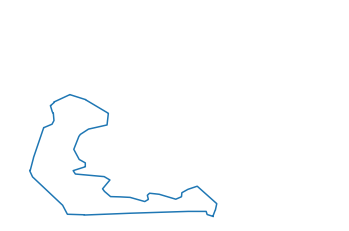

x
y
095bf7a1f-anatomical-structure.json_y


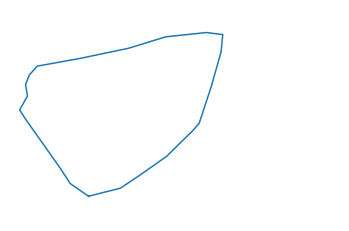

x
y
1e2425f28-anatomical-structure.json_y


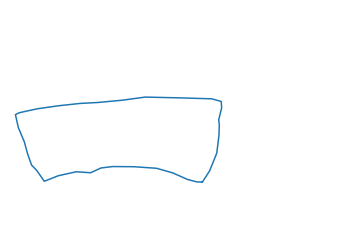

x
y
26dc41664-anatomical-structure.json_y


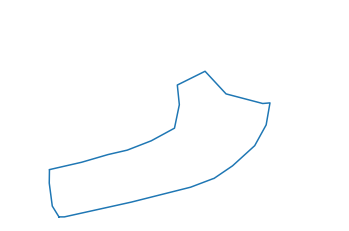

x
y
2f6ecfcdf-anatomical-structure.json_y


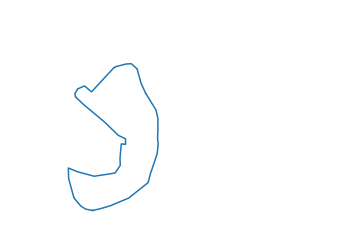

x
y
4ef6695ce-anatomical-structure.json_y


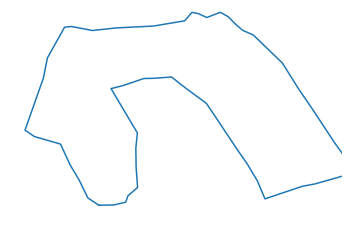

x
y
54f2eec69-anatomical-structure.json_y


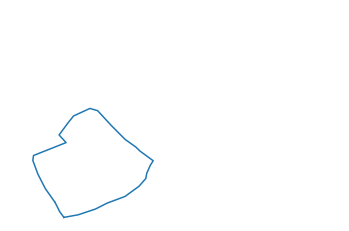

x
y
8242609fa-anatomical-structure.json_y


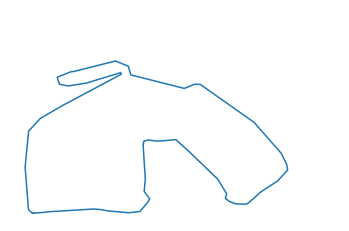

x
y
aaa6a05cc-anatomical-structure.json_y


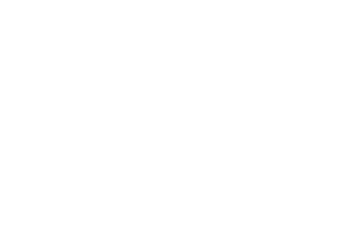

x
y
afa5e8098-anatomical-structure.json_y


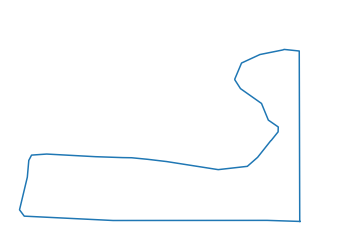

x
y
b2dc8411c-anatomical-structure.json_y


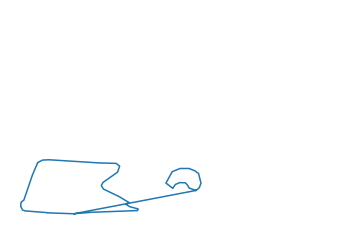

x
y
b9a3865fc-anatomical-structure.json_y


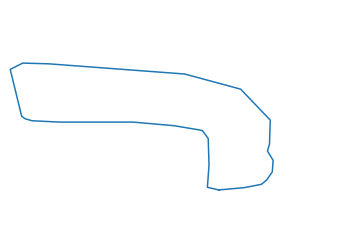

x
y
c68fe75ea-anatomical-structure.json_y


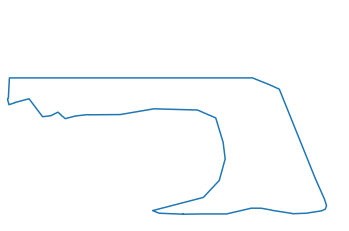

x
y
cb2d976f4-anatomical-structure.json_y


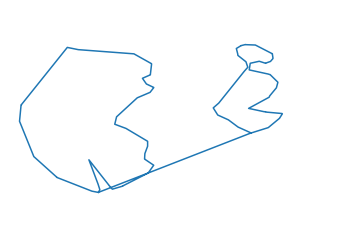

x
y
e79de561c-anatomical-structure.json_y


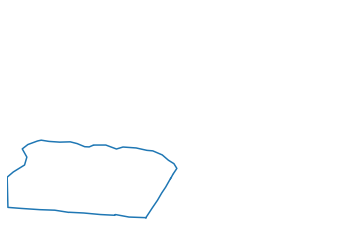

'for i, group in df.groupby("Studentid"):\n    plt.figure()\n    x=group[\'DateProgress\']\n    y=group[\'BookProgress\']\n    plt.scatter(x,y)\n\n    plt.plot(range(4))\n    plt.xlim(-.5, 3.5)\n    plt.ylim(-.5, 3.5)\n    plt.xlabel(\'DateProgress\')\n    plt.ylabel(\'BookProgress\')\n\n    plt.gca().set_aspect(\'equal\', adjustable=\'box\')\n\n    plt.title(i) #Label each plot\n\n    plt.show()\nplt.xlim(0, 50000)\nplt.ylim(0, 40000)\nplt.axis (\'off\')\nplt.plot(poly[0,:],poly[1,:])\n#plt.fill(poly[0],poly[1], edgecolor=\'r\', fill=False)\n#plt.plot(x,y, scalex=True, scaley=True)'

In [345]:
import matplotlib.pyplot as plt
#from shapely.geometry import Polygon
#polygon1 = Polygon(poly)
#x,y = polygon1.exterior.xy
#x,y = polygon1.boundary.xy
x=y=[]
poly=np.array([[],[]])
for column in cortex_coord_df.columns:
  print (column[-1])
  if column[-1] == 'x':
    xlist = list(cortex_coord_df[column].loc[1:115])
  else:
    ylist = list(cortex_coord_df[column].loc[1:115])
#x = (float(i) for i in list(cortex_coord_df['0486052bb-anatomical-structure.json_x'].loc[1:115]))
#y = (float(i) for i in list(cortex_coord_df['0486052bb-anatomical-structure.json_y'].loc[1:115]))
#x = (float(i) for i in list(cortex_coord_df.loc[1:115]))
#y = (float(i) for i in list(cortex_coord_df.loc[1:115]))
#print (xlist)
#print (ylist)
#poly = [list(a) for a in zip(x, y)]
#poly=np.array(poly)
    poly=np.array([xlist,ylist])
  #print (poly,poly1)


#poly = [list(a) for a in zip(x, y)]
#poly=np.array(poly)
    print (column)
    plt.xlim(0, 50000)
    plt.ylim(0, 40000)
    plt.axis ('off')
    plt.plot(poly[0,:],poly[1,:])
    plt.show() 
'''for i, group in df.groupby("Studentid"):
    plt.figure()
    x=group['DateProgress']
    y=group['BookProgress']
    plt.scatter(x,y)

    plt.plot(range(4))
    plt.xlim(-.5, 3.5)
    plt.ylim(-.5, 3.5)
    plt.xlabel('DateProgress')
    plt.ylabel('BookProgress')

    plt.gca().set_aspect('equal', adjustable='box')

    plt.title(i) #Label each plot

    plt.show()
plt.xlim(0, 50000)
plt.ylim(0, 40000)
plt.axis ('off')
plt.plot(poly[0,:],poly[1,:])
#plt.fill(poly[0],poly[1], edgecolor='r', fill=False)
#plt.plot(x,y, scalex=True, scaley=True)'''

#Create files by patient numbers for comparisions beween patients
column label = patient number with appendices(_size, _ecc, _glom_density, _area_ratio)
Name df = data_by_patient_df

In [346]:
meta_raw_size_df.head(20)

,1,2,4,5,6,7,8,10,11,12,13,14,16,18,19
image_file,afa5e8098.tiff,54f2eec69.tiff,1e2425f28.tiff,e79de561c.tiff,c68fe75ea.tiff,095bf7a1f.tiff,26dc41664.tiff,4ef6695ce.tiff,aaa6a05cc.tiff,b9a3865fc.tiff,cb2d976f4.tiff,b2dc8411c.tiff,0486052bb.tiff,2f6ecfcdf.tiff,8242609fa.tiff
width_pixels,43780,22240,32220,27020,49780,39000,42360,50680,13013,40429,49548,31262,34937,25794,44066
height_pixels,36800,30440,26780,16180,26840,38160,38160,39960,18484,31295,34940,14844,25784,31278,31299
anatomical_structures_segmention_file,afa5e8098-anatomical-structure.json,54f2eec69-anatomical-structure.json,1e2425f28-anatomical-structure.json,e79de561c-anatomical-structure.json,c68fe75ea-anatomical-structure.json,095bf7a1f-anatomical-structure.json,26dc41664-anatomical-structure.json,4ef6695ce-anatomical-structure.json,aaa6a05cc-anatomical-structure.json,b9a3865fc-anatomical-structure.json,cb2d976f4-anatomical-structure.json,b2dc8411c-anatomical-structure.json,0486052bb-anatomical-structure.json,2f6ecfcdf-anatomical-structure.json,8242609fa-anatomical-structure.json
glomerulus_segmentation_file,afa5e8098.json,54f2eec69.json,1e2425f28.json,e79de561c.json,c68fe75ea.json,095bf7a1f.json,26dc41664.json,4ef6695ce.json,aaa6a05cc.json,b9a3865fc.json,cb2d976f4.json,b2dc8411c.json,0486052bb.json,2f6ecfcdf.json,8242609fa.json
patient_number,67347,67548,63921,67026,67112,68250,68304,66999,65631,67347,67548,67026,67177,68555,66999
race,White,Black or African American,White,Black or African American,White,White,White,White,White,White,Black or African American,Black or African American,White,White,White
ethnicity,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino
sex,Female,Male,Male,Male,Male,Female,Female,Male,Female,Female,Male,Male,Male,Female,Male
age,58,58,48,53,56,44,66,56,73,58,58,53,31,76,56


In [347]:
#concatenate df columns where row1 in df1 contains names of columns in df2
def concat_col_df(df1, df2, row1):
  concat_df = pd.DataFrame()
  for column in df1.columns:
    data_col = df1[column][row1]
    new_column =pd.concat([df1[column],df2[data_col]], ignore_index=False, axis=0)
    #print (type(new_column), new_column)
    concat_df[column] = new_column
  return concat_df

row = 'glomerulus_segmentation_file' 
meta_raw_size_df = concat_col_df(HubMAP_train_df, glom_sizes_df, row)                                                                                                                                                                                   
meta_raw_size_df

,1,2,4,5,6,7,8,10,11,12,13,14,16,18,19
image_file,afa5e8098.tiff,54f2eec69.tiff,1e2425f28.tiff,e79de561c.tiff,c68fe75ea.tiff,095bf7a1f.tiff,26dc41664.tiff,4ef6695ce.tiff,aaa6a05cc.tiff,b9a3865fc.tiff,cb2d976f4.tiff,b2dc8411c.tiff,0486052bb.tiff,2f6ecfcdf.tiff,8242609fa.tiff
width_pixels,43780,22240,32220,27020,49780,39000,42360,50680,13013,40429,49548,31262,34937,25794,44066
height_pixels,36800,30440,26780,16180,26840,38160,38160,39960,18484,31295,34940,14844,25784,31278,31299
anatomical_structures_segmention_file,afa5e8098-anatomical-structure.json,54f2eec69-anatomical-structure.json,1e2425f28-anatomical-structure.json,e79de561c-anatomical-structure.json,c68fe75ea-anatomical-structure.json,095bf7a1f-anatomical-structure.json,26dc41664-anatomical-structure.json,4ef6695ce-anatomical-structure.json,aaa6a05cc-anatomical-structure.json,b9a3865fc-anatomical-structure.json,cb2d976f4-anatomical-structure.json,b2dc8411c-anatomical-structure.json,0486052bb-anatomical-structure.json,2f6ecfcdf-anatomical-structure.json,8242609fa-anatomical-structure.json
glomerulus_segmentation_file,afa5e8098.json,54f2eec69.json,1e2425f28.json,e79de561c.json,c68fe75ea.json,095bf7a1f.json,26dc41664.json,4ef6695ce.json,aaa6a05cc.json,b9a3865fc.json,cb2d976f4.json,b2dc8411c.json,0486052bb.json,2f6ecfcdf.json,8242609fa.json
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11589.875
582,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20067.375
583,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17115.5
584,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16878.25


In [348]:
column_labels = meta_raw_size_df.loc['patient_number'].astype(str) + '_size'
#df['col'] = 'str' + df['col'].astype(str)
print (column_labels)
#type(column_labels[0])

1     67347_size
2     67548_size
4     63921_size
5     67026_size
6     67112_size
7     68250_size
8     68304_size
10    66999_size
11    65631_size
12    67347_size
13    67548_size
14    67026_size
16    67177_size
18    68555_size
19    66999_size
Name: patient_number, dtype: object


In [349]:
column_labels = meta_raw_size_df.loc['patient_number'].astype(str) + '_size'

size_by_patient_df = meta_raw_size_df.loc[[x for x in list(meta_raw_size_df.index) if isinstance(x, numbers.Number)]]
size_by_patient_df.columns = column_labels
size_by_patient_df

patient_number,67347_size,67548_size,63921_size,67026_size,67112_size,68250_size,68304_size,66999_size,65631_size,67347_size,67548_size,67026_size,67177_size,68555_size,66999_size
0,12495.545,34867.375,25243.7575,22341.625,45627.0,41656.6025,29951.98,29252.1825,9147.0,8399.34,21380.2075,17769.715,23123.9625,18200.75,10578.0
1,32685.0,12663.15,23595.25,26113.125,31566.625,43075.0625,30787.42,13775.7925,11595.1175,10590.375,20461.375,9044.375,24261.5,6217.75,21523.2025
2,19334.1975,37035.25,36646.625,19233.625,16251.8925,31749.7575,26108.27,20913.81,11542.0,4417.375,14016.4925,13632.875,25097.8775,16824.75,16146.625
3,14220.0,43828.625,29883.2475,31691.875,32345.875,34325.5625,15797.625,30714.1225,11958.0,14390.125,18146.625,9006.25,17337.125,11239.445,19172.125
4,11533.055,22849.875,24615.5,23894.1125,34477.375,27329.7825,24642.105,29964.9225,11897.875,17460.375,10734.18,6844.625,7892.875,15359.8525,15010.535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11589.875
582,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20067.375
583,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17115.5
584,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16878.25


In [350]:
column_labels = meta_raw_ecc_df.loc['patient_number'].astype(str) + '_ecc'

ecc_by_patient_df = meta_raw_ecc_df.loc[[x for x in list(meta_raw_ecc_df.index) if isinstance(x, numbers.Number)]]
ecc_by_patient_df.columns = column_labels
ecc_by_patient_df

patient_number,67347_ecc,67548_ecc,63921_ecc,67026_ecc,67112_ecc,68250_ecc,68304_ecc,66999_ecc,65631_ecc,67347_ecc,67548_ecc,67026_ecc,67177_ecc,68555_ecc,66999_ecc
0,0.66,0.52,0.73,0.77,0.56,0.37,0.69,0.3,0.36,0.34,0.51,0.38,0.61,0.57,0.49
1,0.12,0.22,0.54,0.35,0.52,0.2,0.14,0.5,0.58,0.44,0.66,0.22,0.53,0.76,0.6
2,0.68,0.28,0.55,0.22,0.89,0.24,0.55,0.53,0.61,0.22,0.69,0.4,0.52,0.69,0.62
3,0.37,0.42,0.39,0.53,0.48,0.31,0.3,0.62,0.49,0.4,0.54,0.36,0.63,0.74,0.53
4,0.43,0.29,0.51,0.32,0.42,0.57,0.3,0.51,0.52,0.67,0.23,0.52,0.62,0.64,0.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.29
582,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.59
583,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.66
584,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.38


In [414]:
HMAP_train_stats_df = pd.read_csv('/content/drive/MyDrive/E583/client project/HuBMAP-20-dataset_metadata_stats_corrected.csv', index_col=0)
HMAP_train_stats_df

,1,2,4,5,6,7,8,10,11,12,13,14,16,18,19
image_file,afa5e8098.tiff,54f2eec69.tiff,1e2425f28.tiff,e79de561c.tiff,c68fe75ea.tiff,095bf7a1f.tiff,26dc41664.tiff,4ef6695ce.tiff,aaa6a05cc.tiff,b9a3865fc.tiff,cb2d976f4.tiff,b2dc8411c.tiff,0486052bb.tiff,2f6ecfcdf.tiff,8242609fa.tiff
width_pixels,43780,22240,32220,27020,49780,39000,42360,50680,13013,40429,49548,31262,34937,25794,44066
height_pixels,36800,30440,26780,16180,26840,38160,38160,39960,18484,31295,34940,14844,25784,31278,31299
anatomical_structures_segmention_file,afa5e8098-anatomical-structure.json,54f2eec69-anatomical-structure.json,1e2425f28-anatomical-structure.json,e79de561c-anatomical-structure.json,c68fe75ea-anatomical-structure.json,095bf7a1f-anatomical-structure.json,26dc41664-anatomical-structure.json,4ef6695ce-anatomical-structure.json,aaa6a05cc-anatomical-structure.json,b9a3865fc-anatomical-structure.json,cb2d976f4-anatomical-structure.json,b2dc8411c-anatomical-structure.json,0486052bb-anatomical-structure.json,2f6ecfcdf-anatomical-structure.json,8242609fa-anatomical-structure.json
glomerulus_segmentation_file,afa5e8098.json,54f2eec69.json,1e2425f28.json,e79de561c.json,c68fe75ea.json,095bf7a1f.json,26dc41664.json,4ef6695ce.json,aaa6a05cc.json,b9a3865fc.json,cb2d976f4.json,b2dc8411c.json,0486052bb.json,2f6ecfcdf.json,8242609fa.json
patient_number,67347,67548,63921,67026,67112,68250,68304,66999,65631,67347,67548,67026,67177,68555,66999
race,White,Black or African American,White,Black or African American,White,White,White,White,White,White,Black or African American,Black or African American,White,White,White
ethnicity,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino
sex,Female,Male,Male,Male,Male,Female,Female,Male,Female,Female,Male,Male,Male,Female,Male
age,58,58,48,53,56,44,66,56,73,58,58,53,31,76,56


In [352]:
column_labels = meta_raw_ecc_df.loc['patient_number'].astype(str) + '_glom_density'
#print (column_labels)
#print (HMAP_train_stats_df.loc['glom_count_density glom/sq.mm'])
glom_density_by_patient_df = HMAP_train_stats_df.loc['glom_count_density glom/sq.mm'].to_frame().T

glom_density_by_patient_df.columns = column_labels
glom_density_by_patient_df = glom_density_by_patient_df.rename(index={'glom_count_density glom/sq.mm': 0})
glom_density_by_patient_df

patient_number,67347_glom_density,67548_glom_density,63921_glom_density,67026_glom_density,67112_glom_density,68250_glom_density,68304_glom_density,66999_glom_density,65631_glom_density,67347_glom_density,67548_glom_density,67026_glom_density,67177_glom_density,68555_glom_density,66999_glom_density
0,0.9216853720057351,0.8312698920894839,1.8925654067381625,2.600541418998356,0.9179263908253911,2.3938534372688753,2.566176759389018,1.1327497407743985,4.522377894445276,4.219826859649186,2.790161463845005,1.335908918939969,2.5091074448108186,3.268345658898906,3.552084058141655


In [353]:
column_labels = meta_raw_ecc_df.loc['patient_number'].astype(str) + '_area_ratio'
#print (column_labels)
#print (HMAP_train_stats_df.loc['glom_count_density glom/sq.mm'])
area_ratio_by_patient_df = HMAP_train_stats_df.loc['glom_area_density'].to_frame().T

area_ratio_by_patient_df.columns = column_labels
print (area_ratio_by_patient_df.columns)
area_ratio_by_patient_df = area_ratio_by_patient_df.rename(index={'glom_area_density': 0})
area_ratio_by_patient_df

Index(['67347_area_ratio', '67548_area_ratio', '63921_area_ratio', '67026_area_ratio', '67112_area_ratio', '68250_area_ratio', '68304_area_ratio', '66999_area_ratio', '65631_area_ratio',
       '67347_area_ratio', '67548_area_ratio', '67026_area_ratio', '67177_area_ratio', '68555_area_ratio', '66999_area_ratio'],
      dtype='object', name='patient_number')


patient_number,67347_area_ratio,67548_area_ratio,63921_area_ratio,67026_area_ratio,67112_area_ratio,68250_area_ratio,68304_area_ratio,66999_area_ratio,65631_area_ratio,67347_area_ratio,67548_area_ratio,67026_area_ratio,67177_area_ratio,68555_area_ratio,66999_area_ratio
0,0.026048374279250924,0.021168265450467183,0.049612154564333544,0.057277331991001275,0.025393724912446985,0.05949903234074705,0.06785235762298497,0.02877751565354592,0.04900044607387973,0.05941738445355457,0.054976138740332726,0.014771844913631765,0.04599503521944853,0.04070760796795401,0.04902040167437817


In [354]:
size_ecc_density_by_patient_df  = pd.concat([size_by_patient_df, ecc_by_patient_df, glom_density_by_patient_df,area_ratio_by_patient_df], axis=1, ignore_index=False)
size_ecc_density_by_patient_df
size_ecc_density_by_patient_df.to_csv('/content/drive/MyDrive/E583/client project/size_ecc_density_by_patient.csv')

# Create transpose of data for tableau

In [355]:
HMAP_train_stats_df_transpose = HMAP_train_stats_df.T
HMAP_train_stats_df_transpose.to_csv('/content/drive/MyDrive/E583/client project/HuBMAP-20-dataset_metadata_stats_corrected_tranpose.csv')
HMAP_train_stats_df_transpose

,image_file,width_pixels,height_pixels,anatomical_structures_segmention_file,glomerulus_segmentation_file,patient_number,race,ethnicity,sex,age,...,ecc_count,ecc_mean,ecc_std,ecc_min,ecc_25%,ecc_50%,ecc_75%,ecc_max,glom_count_density glom/sq.mm,glom_area_density
1,afa5e8098.tiff,43780,36800,afa5e8098-anatomical-structure.json,afa5e8098.json,67347,White,Not Hispanic or Latino,Female,58,...,235.0,0.4448085106382979,0.19579409190010305,0.0,0.32,0.46,0.6,0.91,0.9216853720057351,0.026048374279250924
2,54f2eec69.tiff,22240,30440,54f2eec69-anatomical-structure.json,54f2eec69.json,67548,Black or African American,Not Hispanic or Latino,Male,58,...,139.0,0.460863309352518,0.17096267078944918,0.07,0.36,0.48,0.575,0.84,0.8312698920894839,0.021168265450467183
4,1e2425f28.tiff,32220,26780,1e2425f28-anatomical-structure.json,1e2425f28.json,63921,White,Not Hispanic or Latino,Male,48,...,178.0,0.4473595505617977,0.16962336125157626,0.07,0.33,0.46,0.58,0.82,1.8925654067381625,0.049612154564333544
5,e79de561c.tiff,27020,16180,e79de561c-anatomical-structure.json,e79de561c.json,67026,Black or African American,Not Hispanic or Latino,Male,53,...,180.0,0.4652777777777778,0.16055918540332878,0.0,0.35,0.49,0.58,0.79,2.600541418998356,0.057277331991001275
6,c68fe75ea.tiff,49780,26840,c68fe75ea-anatomical-structure.json,c68fe75ea.json,67112,White,Not Hispanic or Latino,Male,56,...,118.0,0.48669491525423725,0.17866099821062428,0.0,0.38,0.495,0.6174999999999999,0.89,0.9179263908253911,0.025393724912446985
7,095bf7a1f.tiff,39000,38160,095bf7a1f-anatomical-structure.json,095bf7a1f.json,68250,White,Not Hispanic or Latino,Female,44,...,350.0,0.4662000000000001,0.16703932930844945,0.0,0.3525,0.46,0.59,0.89,2.3938534372688753,0.05949903234074705
8,26dc41664.tiff,42360,38160,26dc41664-anatomical-structure.json,26dc41664.json,68304,White,Not Hispanic or Latino,Female,66,...,245.0,0.4691428571428572,0.1775553481012168,0.07,0.35,0.48,0.6,0.86,2.566176759389018,0.06785235762298497
10,4ef6695ce.tiff,50680,39960,4ef6695ce-anatomical-structure.json,4ef6695ce.json,66999,White,Not Hispanic or Latino,Male,56,...,439.0,0.4497266514806378,0.1723750768502428,0.0,0.32,0.46,0.59,0.88,1.1327497407743985,0.02877751565354592
11,aaa6a05cc.tiff,13013,18484,aaa6a05cc-anatomical-structure.json,aaa6a05cc.json,65631,White,Not Hispanic or Latino,Female,73,...,99.0,0.4856565656565656,0.16185885521828805,0.0,0.36,0.48,0.61,0.81,4.522377894445276,0.04900044607387973
12,b9a3865fc.tiff,40429,31295,b9a3865fc-anatomical-structure.json,b9a3865fc.json,67347,White,Not Hispanic or Latino,Female,58,...,469.0,0.44782515991471217,0.1730000596753578,0.0,0.33,0.46,0.58,0.81,4.219826859649186,0.05941738445355457


# Combine same patients

In [356]:
HMAP_train_stats_df

,1,2,4,5,6,7,8,10,11,12,13,14,16,18,19
image_file,afa5e8098.tiff,54f2eec69.tiff,1e2425f28.tiff,e79de561c.tiff,c68fe75ea.tiff,095bf7a1f.tiff,26dc41664.tiff,4ef6695ce.tiff,aaa6a05cc.tiff,b9a3865fc.tiff,cb2d976f4.tiff,b2dc8411c.tiff,0486052bb.tiff,2f6ecfcdf.tiff,8242609fa.tiff
width_pixels,43780,22240,32220,27020,49780,39000,42360,50680,13013,40429,49548,31262,34937,25794,44066
height_pixels,36800,30440,26780,16180,26840,38160,38160,39960,18484,31295,34940,14844,25784,31278,31299
anatomical_structures_segmention_file,afa5e8098-anatomical-structure.json,54f2eec69-anatomical-structure.json,1e2425f28-anatomical-structure.json,e79de561c-anatomical-structure.json,c68fe75ea-anatomical-structure.json,095bf7a1f-anatomical-structure.json,26dc41664-anatomical-structure.json,4ef6695ce-anatomical-structure.json,aaa6a05cc-anatomical-structure.json,b9a3865fc-anatomical-structure.json,cb2d976f4-anatomical-structure.json,b2dc8411c-anatomical-structure.json,0486052bb-anatomical-structure.json,2f6ecfcdf-anatomical-structure.json,8242609fa-anatomical-structure.json
glomerulus_segmentation_file,afa5e8098.json,54f2eec69.json,1e2425f28.json,e79de561c.json,c68fe75ea.json,095bf7a1f.json,26dc41664.json,4ef6695ce.json,aaa6a05cc.json,b9a3865fc.json,cb2d976f4.json,b2dc8411c.json,0486052bb.json,2f6ecfcdf.json,8242609fa.json
patient_number,67347,67548,63921,67026,67112,68250,68304,66999,65631,67347,67548,67026,67177,68555,66999
race,White,Black or African American,White,Black or African American,White,White,White,White,White,White,Black or African American,Black or African American,White,White,White
ethnicity,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino
sex,Female,Male,Male,Male,Male,Female,Female,Male,Female,Female,Male,Male,Male,Female,Male
age,58,58,48,53,56,44,66,56,73,58,58,53,31,76,56


Combine Sizes

In [357]:
jsonname_raw_size_df.to_csv('/content/drive/MyDrive/E583/client project/jsonname_raw_size_corrected.csv')
jsonname_raw_ecc_df.to_csv('/content/drive/MyDrive/E583/client project/jsonname_raw_ecc.csv')

In [358]:
jsonname_raw_size_df

glomerulus_segmentation_file,afa5e8098.json,54f2eec69.json,1e2425f28.json,e79de561c.json,c68fe75ea.json,095bf7a1f.json,26dc41664.json,4ef6695ce.json,aaa6a05cc.json,b9a3865fc.json,cb2d976f4.json,b2dc8411c.json,0486052bb.json,2f6ecfcdf.json,8242609fa.json
0,12495.545,34867.375,25243.7575,22341.625,45627.0,41656.6025,29951.98,29252.1825,9147.0,8399.34,21380.2075,17769.715,23123.9625,18200.75,10578.0
1,32685.0,12663.15,23595.25,26113.125,31566.625,43075.0625,30787.42,13775.7925,11595.1175,10590.375,20461.375,9044.375,24261.5,6217.75,21523.2025
2,19334.1975,37035.25,36646.625,19233.625,16251.8925,31749.7575,26108.27,20913.81,11542.0,4417.375,14016.4925,13632.875,25097.8775,16824.75,16146.625
3,14220.0,43828.625,29883.2475,31691.875,32345.875,34325.5625,15797.625,30714.1225,11958.0,14390.125,18146.625,9006.25,17337.125,11239.445,19172.125
4,11533.055,22849.875,24615.5,23894.1125,34477.375,27329.7825,24642.105,29964.9225,11897.875,17460.375,10734.18,6844.625,7892.875,15359.8525,15010.535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11589.875
582,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20067.375
583,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17115.5
584,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16878.25


In [359]:
HMAP_train_stats_df.loc['patient_number']

1     67347
2     67548
4     63921
5     67026
6     67112
7     68250
8     68304
10    66999
11    65631
12    67347
13    67548
14    67026
16    67177
18    68555
19    66999
Name: patient_number, dtype: object

In [360]:
col = 0
HMAP_train_stats_df.iloc[:,col]

image_file                                                    afa5e8098.tiff
width_pixels                                                           43780
height_pixels                                                          36800
anatomical_structures_segmention_file    afa5e8098-anatomical-structure.json
glomerulus_segmentation_file                                  afa5e8098.json
patient_number                                                         67347
race                                                                   White
ethnicity                                             Not Hispanic or Latino
sex                                                                   Female
age                                                                       58
weight_kilograms                                                        59.0
height_centimeters                                                     160.0
bmi_kg/m^2                                                              23.0

In [361]:
#concatenate df columns where row1 in df1 contains names of columns in df2
def concat_rows_samecol_df(df1, df2, row1):
  concat_df = pd.DataFrame()
  for column in df1.columns:
    data_col = df1[column][row1]
    new_column =pd.concat([df1[column],df2[data_col]], ignore_index=False, axis=0)
    #print (type(new_column), new_column)
    concat_df[column] = new_column
  return concat_df

row = 'glomerulus_segmentation_file' 
meta_raw_size_df = concat_col_df(HubMAP_train_df, glom_sizes_df, row)                                                                                                                                                                                   
meta_raw_size_df

,1,2,4,5,6,7,8,10,11,12,13,14,16,18,19
image_file,afa5e8098.tiff,54f2eec69.tiff,1e2425f28.tiff,e79de561c.tiff,c68fe75ea.tiff,095bf7a1f.tiff,26dc41664.tiff,4ef6695ce.tiff,aaa6a05cc.tiff,b9a3865fc.tiff,cb2d976f4.tiff,b2dc8411c.tiff,0486052bb.tiff,2f6ecfcdf.tiff,8242609fa.tiff
width_pixels,43780,22240,32220,27020,49780,39000,42360,50680,13013,40429,49548,31262,34937,25794,44066
height_pixels,36800,30440,26780,16180,26840,38160,38160,39960,18484,31295,34940,14844,25784,31278,31299
anatomical_structures_segmention_file,afa5e8098-anatomical-structure.json,54f2eec69-anatomical-structure.json,1e2425f28-anatomical-structure.json,e79de561c-anatomical-structure.json,c68fe75ea-anatomical-structure.json,095bf7a1f-anatomical-structure.json,26dc41664-anatomical-structure.json,4ef6695ce-anatomical-structure.json,aaa6a05cc-anatomical-structure.json,b9a3865fc-anatomical-structure.json,cb2d976f4-anatomical-structure.json,b2dc8411c-anatomical-structure.json,0486052bb-anatomical-structure.json,2f6ecfcdf-anatomical-structure.json,8242609fa-anatomical-structure.json
glomerulus_segmentation_file,afa5e8098.json,54f2eec69.json,1e2425f28.json,e79de561c.json,c68fe75ea.json,095bf7a1f.json,26dc41664.json,4ef6695ce.json,aaa6a05cc.json,b9a3865fc.json,cb2d976f4.json,b2dc8411c.json,0486052bb.json,2f6ecfcdf.json,8242609fa.json
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11589.875
582,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20067.375
583,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17115.5
584,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16878.25


In [362]:
col=[0,1]
print (type(col), type(HMAP_train_stats_df.iloc[:,col]), HMAP_train_stats_df.iloc[:,col])

<class 'list'> <class 'pandas.core.frame.DataFrame'>                                                                          1                                    2
image_file                                                  afa5e8098.tiff                       54f2eec69.tiff
width_pixels                                                         43780                                22240
height_pixels                                                        36800                                30440
anatomical_structures_segmention_file  afa5e8098-anatomical-structure.json  54f2eec69-anatomical-structure.json
glomerulus_segmentation_file                                afa5e8098.json                       54f2eec69.json
patient_number                                                       67347                                67548
race                                                                 White            Black or African American
ethnicity                                          

In [363]:
size_by_patient_df

patient_number,67347_size,67548_size,63921_size,67026_size,67112_size,68250_size,68304_size,66999_size,65631_size,67347_size,67548_size,67026_size,67177_size,68555_size,66999_size
0,12495.545,34867.375,25243.7575,22341.625,45627.0,41656.6025,29951.98,29252.1825,9147.0,8399.34,21380.2075,17769.715,23123.9625,18200.75,10578.0
1,32685.0,12663.15,23595.25,26113.125,31566.625,43075.0625,30787.42,13775.7925,11595.1175,10590.375,20461.375,9044.375,24261.5,6217.75,21523.2025
2,19334.1975,37035.25,36646.625,19233.625,16251.8925,31749.7575,26108.27,20913.81,11542.0,4417.375,14016.4925,13632.875,25097.8775,16824.75,16146.625
3,14220.0,43828.625,29883.2475,31691.875,32345.875,34325.5625,15797.625,30714.1225,11958.0,14390.125,18146.625,9006.25,17337.125,11239.445,19172.125
4,11533.055,22849.875,24615.5,23894.1125,34477.375,27329.7825,24642.105,29964.9225,11897.875,17460.375,10734.18,6844.625,7892.875,15359.8525,15010.535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11589.875
582,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20067.375
583,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17115.5
584,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16878.25


In [364]:
def combine_same_columns(df):
  column_list = list(df.columns)
  combined_df = pd.DataFrame()
  for column in set(df.columns):
    same_list = [i for i, j in enumerate(column_list) if column == j]
    #print (same_list, type(same_list))
    if len(same_list) == 1:
      combined_column = df.iloc[:,same_list]
    if len(same_list) != 1:
      #print ([i for i in same_list])
      #print ([size_by_patient_df.iloc[:,[same_list[0],same_list[1]]]])
      #print ([size_by_patient_df.iloc[:,[i for i in same_list]]]) # 
      #print (pd.concat([size_by_patient_df.iloc[:,same_list[i]] for i in same_list], axis =0, ignore_index=True))
      combined_column = pd.concat([df.iloc[:, i ].dropna() for i in same_list], axis =0, ignore_index=True)
    #print (column, combined_column)
    combined_df = pd.concat([combined_df,combined_column],axis=1)
  return combined_df


In [365]:
size_combined_df = combine_same_columns(size_by_patient_df)
size_combined_df

,63921_size,68250_size,67548_size,65631_size,67026_size,67177_size,66999_size,67112_size,68304_size,68555_size,67347_size
0,25243.7575,41656.6025,34867.375,9147.0,22341.625,23123.9625,29252.1825,45627.0,29951.98,18200.75,12495.545
1,23595.25,43075.0625,12663.15,11595.1175,26113.125,24261.5,13775.7925,31566.625,30787.42,6217.75,32685.0
2,36646.625,31749.7575,37035.25,11542.0,19233.625,25097.8775,20913.81,16251.8925,26108.27,16824.75,19334.1975
3,29883.2475,34325.5625,43828.625,11958.0,31691.875,17337.125,30714.1225,32345.875,15797.625,11239.445,14220.0
4,24615.5,27329.7825,22849.875,11897.875,23894.1125,7892.875,29964.9225,34477.375,24642.105,15359.8525,11533.055
...,...,...,...,...,...,...,...,...,...,...,...
1020,NaN,NaN,NaN,NaN,NaN,NaN,11589.875,NaN,NaN,NaN,NaN
1021,NaN,NaN,NaN,NaN,NaN,NaN,20067.375,NaN,NaN,NaN,NaN
1022,NaN,NaN,NaN,NaN,NaN,NaN,17115.5,NaN,NaN,NaN,NaN
1023,NaN,NaN,NaN,NaN,NaN,NaN,16878.25,NaN,NaN,NaN,NaN


In [366]:
size_combined_df.describe()
ecc_combined_df

,63921_size,68250_size,67548_size,65631_size,67026_size,67177_size,66999_size,67112_size,68304_size,68555_size,67347_size
count,178.0000,350.0000,458.000,99.0,318.0,130.0000,1025.0000,118.0,245.00,160.00,704.000
unique,178.0000,350.0000,458.000,99.0,317.0,130.0000,1025.0000,118.0,245.00,160.00,704.000
top,25243.7575,41656.6025,34867.375,9147.0,14590.0,23123.9625,29252.1825,45627.0,29951.98,18200.75,12495.545
freq,1.0000,1.0000,1.000,1.0,2.0,1.0000,1.0000,1.0,1.00,1.00,1.000


In [445]:
size_combined_stats = size_combined_df.astype(float).describe().round(2)
size_combined_stats


,63921_size,68250_size,67548_size,65631_size,67026_size,67177_size,66999_size,67112_size,68304_size,68555_size,67347_size
count,178.00,350.00,458.00,99.00,318.00,130.00,1025.00,118.00,245.00,160.00,704.00
mean,26214.24,24854.92,21452.12,10835.11,17265.62,18331.23,18770.60,27664.23,26441.03,12455.11,18814.29
std,8645.11,8658.90,8655.87,3326.57,8162.32,7764.96,8675.18,10434.56,8500.02,4755.95,9634.23
min,8379.01,4634.90,3940.33,4189.25,3592.25,2847.46,2488.30,5744.38,6717.68,1937.06,3219.60
25%,19316.86,18797.20,14919.72,8289.34,10950.19,13534.00,12345.33,19739.59,21317.76,8937.69,12312.41
50%,26965.63,25123.51,20891.56,10759.12,15624.38,19534.50,17029.88,26260.75,26949.62,12941.75,16606.38
75%,33114.59,30495.09,27709.44,12899.06,22774.06,23772.03,24748.02,34820.78,31911.10,16133.02,22409.25
max,46043.49,49550.88,51756.24,22365.38,54760.80,47339.22,50575.38,59188.62,50494.75,23677.61,56604.49


In [368]:
ecc_combined_df = combine_same_columns(ecc_by_patient_df)
ecc_combined_df

,63921_ecc,65631_ecc,66999_ecc,67548_ecc,68304_ecc,67177_ecc,67347_ecc,67026_ecc,68555_ecc,68250_ecc,67112_ecc
0,0.73,0.36,0.3,0.52,0.69,0.61,0.66,0.77,0.57,0.37,0.56
1,0.54,0.58,0.5,0.22,0.14,0.53,0.12,0.35,0.76,0.2,0.52
2,0.55,0.61,0.53,0.28,0.55,0.52,0.68,0.22,0.69,0.24,0.89
3,0.39,0.49,0.62,0.42,0.3,0.63,0.37,0.53,0.74,0.31,0.48
4,0.51,0.52,0.51,0.29,0.3,0.62,0.43,0.32,0.64,0.57,0.42
...,...,...,...,...,...,...,...,...,...,...,...
1020,NaN,NaN,0.29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1021,NaN,NaN,0.59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1022,NaN,NaN,0.66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1023,NaN,NaN,0.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [369]:
ecc_combined_df.describe()

,63921_ecc,65631_ecc,66999_ecc,67548_ecc,68304_ecc,67177_ecc,67347_ecc,67026_ecc,68555_ecc,68250_ecc,67112_ecc
count,178.00,99.00,1025.00,458.00,245.00,130.00,704.0,318.00,160.00,350.0,118.00
unique,61.00,52.00,82.00,73.00,72.00,59.00,79.0,69.00,59.00,76.0,60.00
top,0.66,0.47,0.41,0.55,0.35,0.53,0.5,0.55,0.38,0.6,0.56
freq,8.00,6.00,36.00,17.00,8.00,8.00,20.0,14.00,8.00,13.0,5.00


In [446]:
ecc_combined_stats = ecc_combined_df.astype(float).describe().round(4)
ecc_combined_stats

,63921_ecc,65631_ecc,66999_ecc,67548_ecc,68304_ecc,67177_ecc,67347_ecc,67026_ecc,68555_ecc,68250_ecc,67112_ecc
count,178.0000,99.0000,1025.0000,458.0000,245.0000,130.0000,704.0000,318.0000,160.0000,350.0000,118.0000
mean,0.4474,0.4857,0.4281,0.4775,0.4691,0.4657,0.4468,0.4554,0.4816,0.4662,0.4867
std,0.1696,0.1619,0.1682,0.1662,0.1776,0.1727,0.1808,0.1619,0.1732,0.1670,0.1787
min,0.0700,0.0000,0.0000,0.0700,0.0700,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,0.3300,0.3600,0.3100,0.3525,0.3500,0.3625,0.3200,0.3325,0.3600,0.3525,0.3800
50%,0.4600,0.4800,0.4400,0.5000,0.4800,0.4900,0.4600,0.4700,0.4900,0.4600,0.4950
75%,0.5800,0.6100,0.5500,0.6000,0.6000,0.5700,0.5900,0.5700,0.6125,0.5900,0.6175
max,0.8200,0.8100,0.8800,0.8500,0.8600,0.8200,0.9100,0.8000,0.8600,0.8900,0.8900


In [449]:
def rename_index(df, prefix):
  df = df.rename(index=lambda s: prefix + s)
  #print (df)
  return df
size_combined_stats = rename_index(size_combined_stats, 'size_')
ecc_combined_stats = rename_index(ecc_combined_stats, 'ecc_')
print (size_combined_stats)
print (ecc_combined_stats)

            63921_size  68250_size  67548_size  65631_size  67026_size  67177_size  66999_size  67112_size  68304_size  68555_size  67347_size
size_count      178.00      350.00      458.00       99.00      318.00      130.00     1025.00      118.00      245.00      160.00      704.00
size_mean     26214.24    24854.92    21452.12    10835.11    17265.62    18331.23    18770.60    27664.23    26441.03    12455.11    18814.29
size_std       8645.11     8658.90     8655.87     3326.57     8162.32     7764.96     8675.18    10434.56     8500.02     4755.95     9634.23
size_min       8379.01     4634.90     3940.33     4189.25     3592.25     2847.46     2488.30     5744.38     6717.68     1937.06     3219.60
size_25%      19316.86    18797.20    14919.72     8289.34    10950.19    13534.00    12345.33    19739.59    21317.76     8937.69    12312.41
size_50%      26965.63    25123.51    20891.56    10759.12    15624.38    19534.50    17029.88    26260.75    26949.62    12941.75    16606.38

# Combine Metadata

In [415]:
HMAP_train_stats_df

,1,2,4,5,6,7,8,10,11,12,13,14,16,18,19
image_file,afa5e8098.tiff,54f2eec69.tiff,1e2425f28.tiff,e79de561c.tiff,c68fe75ea.tiff,095bf7a1f.tiff,26dc41664.tiff,4ef6695ce.tiff,aaa6a05cc.tiff,b9a3865fc.tiff,cb2d976f4.tiff,b2dc8411c.tiff,0486052bb.tiff,2f6ecfcdf.tiff,8242609fa.tiff
width_pixels,43780,22240,32220,27020,49780,39000,42360,50680,13013,40429,49548,31262,34937,25794,44066
height_pixels,36800,30440,26780,16180,26840,38160,38160,39960,18484,31295,34940,14844,25784,31278,31299
anatomical_structures_segmention_file,afa5e8098-anatomical-structure.json,54f2eec69-anatomical-structure.json,1e2425f28-anatomical-structure.json,e79de561c-anatomical-structure.json,c68fe75ea-anatomical-structure.json,095bf7a1f-anatomical-structure.json,26dc41664-anatomical-structure.json,4ef6695ce-anatomical-structure.json,aaa6a05cc-anatomical-structure.json,b9a3865fc-anatomical-structure.json,cb2d976f4-anatomical-structure.json,b2dc8411c-anatomical-structure.json,0486052bb-anatomical-structure.json,2f6ecfcdf-anatomical-structure.json,8242609fa-anatomical-structure.json
glomerulus_segmentation_file,afa5e8098.json,54f2eec69.json,1e2425f28.json,e79de561c.json,c68fe75ea.json,095bf7a1f.json,26dc41664.json,4ef6695ce.json,aaa6a05cc.json,b9a3865fc.json,cb2d976f4.json,b2dc8411c.json,0486052bb.json,2f6ecfcdf.json,8242609fa.json
patient_number,67347,67548,63921,67026,67112,68250,68304,66999,65631,67347,67548,67026,67177,68555,66999
race,White,Black or African American,White,Black or African American,White,White,White,White,White,White,Black or African American,Black or African American,White,White,White
ethnicity,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino
sex,Female,Male,Male,Male,Male,Female,Female,Male,Female,Female,Male,Male,Male,Female,Male
age,58,58,48,53,56,44,66,56,73,58,58,53,31,76,56


In [426]:
combined_train_stats_new[numeric_columns]

KeyError: ignored

In [441]:
def constant_data(x):
  x = list(x)
  print (x)
  if np.isnan(x).any():
     x=[-9999]
  else:
    x = set(x)
  print (x)
  return x
HMAP_train_stats_filled_df = HMAP_train_stats_df.fillna('no value')
combined_train_stats_df = HMAP_train_stats_filled_df.T
text_columns = ['image_file', 'width_pixels','height_pixels', 'anatomical_structures_segmention_file', 'glomerulus_segmentation_file', 'patient_number', \
                'race', 'ethnicity', 'sex', 'age', 'weight_kilograms', 'height_centimeters', 'bmi_kg/m^2', 'bsa_m^2', \
                'laterality', 'percent_cortex', 'percent_medulla']
numeric_columns =['cortex_area']
constant_columns = ['age'] #, 'weight_kilograms', 'height_centimeters', 'height_centimeters']
combined_train_stats_new =pd.DataFrame()
print (len(combined_train_stats_df['weight_kilograms']), len(combined_train_stats_df['patient_number']))
print (type(list(combined_train_stats_df[numeric_columns])[0]))
combined_train_stats_new[text_columns]= combined_train_stats_df[text_columns].groupby(combined_train_stats_df['patient_number'], dropna=False).agg(lambda x: ', '.join(set(x)))
#print (combined_train_stats_df)
combined_train_stats_new[numeric_columns]= combined_train_stats_df[numeric_columns].groupby(combined_train_stats_df['patient_number'], dropna=False).agg(lambda x: sum(pd.to_numeric(x)))

#HMAP_train_stats_df.groupby(HMAP_train_stats_df, by=HMAP_train_stats_df.loc['patient_number'], as_index=False).sum()#, axis=1)#.agg(lambda x: x.apply(';'.join, 1))
#combined_train_stats_df= combined_train_stats_df
#combined_train_stats_df = combined_train_stats_df.groupby(HMAP_train_stats_df.loc['patient_number'])
#.groupby(HMAP_train_stats_df.loc['patient_number'], axis=1).agg(lambda x: x.apply(';'.join, 1))
#.astype(str).groupby(HMAP_train_stats_df.columns, axis=1).agg(lambda x: x.apply(';'.join, 1))
#combined_train_stats_df = combined_train_stats_df.loc['image_file'].T
combined_train_stats_df = combined_train_stats_new.T
combined_train_stats_df = combined_train_stats_df.replace('no value', 'NaN')
combined_train_stats_df
#combined_train_stats_df .astype(str).groupby(HMAP_train_stats_df.columns, axis=1).agg(lambda x: x.apply(';'.join, 1))

15 15
<class 'str'>


patient_number,63921,65631,66999,67026,67112,67177,67347,67548,68250,68304,68555
image_file,1e2425f28.tiff,aaa6a05cc.tiff,"8242609fa.tiff, 4ef6695ce.tiff","b2dc8411c.tiff, e79de561c.tiff",c68fe75ea.tiff,0486052bb.tiff,"afa5e8098.tiff, b9a3865fc.tiff","cb2d976f4.tiff, 54f2eec69.tiff",095bf7a1f.tiff,26dc41664.tiff,2f6ecfcdf.tiff
width_pixels,32220,13013,"44066, 50680","31262, 27020",49780,34937,"40429, 43780","22240, 49548",39000,42360,25794
height_pixels,26780,18484,"31299, 39960","16180, 14844",26840,25784,"31295, 36800","30440, 34940",38160,38160,31278
anatomical_structures_segmention_file,1e2425f28-anatomical-structure.json,aaa6a05cc-anatomical-structure.json,"4ef6695ce-anatomical-structure.json, 8242609fa...","b2dc8411c-anatomical-structure.json, e79de561c...",c68fe75ea-anatomical-structure.json,0486052bb-anatomical-structure.json,"b9a3865fc-anatomical-structure.json, afa5e8098...","cb2d976f4-anatomical-structure.json, 54f2eec69...",095bf7a1f-anatomical-structure.json,26dc41664-anatomical-structure.json,2f6ecfcdf-anatomical-structure.json
glomerulus_segmentation_file,1e2425f28.json,aaa6a05cc.json,"8242609fa.json, 4ef6695ce.json","b2dc8411c.json, e79de561c.json",c68fe75ea.json,0486052bb.json,"afa5e8098.json, b9a3865fc.json","54f2eec69.json, cb2d976f4.json",095bf7a1f.json,26dc41664.json,2f6ecfcdf.json
patient_number,63921,65631,66999,67026,67112,67177,67347,67548,68250,68304,68555
race,White,White,White,Black or African American,White,White,White,Black or African American,White,White,White
ethnicity,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino
sex,Male,Female,Male,Male,Male,Male,Female,Male,Female,Female,Female
age,48,73,56,53,56,31,58,58,44,66,76


concatenate metadata, size stats and eccentricity stats

In [450]:
row = 'patient_number'                                                                                                                                                                                     
combined_meta_size_ecc_df = pd.DataFrame()
for column in combined_train_stats_df.columns:
  data_col = combined_train_stats_df[column][row]
  new_column =pd.concat([combined_train_stats_df[column],size_combined_stats[data_col+'_size'], ecc_combined_stats[data_col+'_ecc']], ignore_index=False, axis=0)#, ecc_stats[data_col]], axis=0)
  #print (type(new_column), new_column)
  combined_meta_size_ecc_df[column] = new_column
combined_meta_size_ecc_df


,63921,65631,66999,67026,67112,67177,67347,67548,68250,68304,68555
image_file,1e2425f28.tiff,aaa6a05cc.tiff,"8242609fa.tiff, 4ef6695ce.tiff","b2dc8411c.tiff, e79de561c.tiff",c68fe75ea.tiff,0486052bb.tiff,"afa5e8098.tiff, b9a3865fc.tiff","cb2d976f4.tiff, 54f2eec69.tiff",095bf7a1f.tiff,26dc41664.tiff,2f6ecfcdf.tiff
width_pixels,32220,13013,"44066, 50680","31262, 27020",49780,34937,"40429, 43780","22240, 49548",39000,42360,25794
height_pixels,26780,18484,"31299, 39960","16180, 14844",26840,25784,"31295, 36800","30440, 34940",38160,38160,31278
anatomical_structures_segmention_file,1e2425f28-anatomical-structure.json,aaa6a05cc-anatomical-structure.json,"4ef6695ce-anatomical-structure.json, 8242609fa...","b2dc8411c-anatomical-structure.json, e79de561c...",c68fe75ea-anatomical-structure.json,0486052bb-anatomical-structure.json,"b9a3865fc-anatomical-structure.json, afa5e8098...","cb2d976f4-anatomical-structure.json, 54f2eec69...",095bf7a1f-anatomical-structure.json,26dc41664-anatomical-structure.json,2f6ecfcdf-anatomical-structure.json
glomerulus_segmentation_file,1e2425f28.json,aaa6a05cc.json,"8242609fa.json, 4ef6695ce.json","b2dc8411c.json, e79de561c.json",c68fe75ea.json,0486052bb.json,"afa5e8098.json, b9a3865fc.json","54f2eec69.json, cb2d976f4.json",095bf7a1f.json,26dc41664.json,2f6ecfcdf.json
patient_number,63921,65631,66999,67026,67112,67177,67347,67548,68250,68304,68555
race,White,White,White,Black or African American,White,White,White,Black or African American,White,White,White
ethnicity,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino
sex,Male,Female,Male,Male,Male,Male,Female,Male,Female,Female,Female
age,48,73,56,53,56,31,58,58,44,66,76


Add Glomerular densities

In [451]:
combined_meta_size_ecc_df.loc['glom_count_density glom/sq.mm']=combined_meta_size_ecc_df.loc['size_count']/combined_meta_size_ecc_df.loc['cortex_area']*1E6
combined_meta_size_ecc_df.loc['glom_area_density']=combined_meta_size_ecc_df.loc['size_count']*combined_meta_size_ecc_df.loc['size_mean']/combined_meta_size_ecc_df.loc['cortex_area']
combined_meta_size_ecc_df

,63921,65631,66999,67026,67112,67177,67347,67548,68250,68304,68555
image_file,1e2425f28.tiff,aaa6a05cc.tiff,"8242609fa.tiff, 4ef6695ce.tiff","b2dc8411c.tiff, e79de561c.tiff",c68fe75ea.tiff,0486052bb.tiff,"afa5e8098.tiff, b9a3865fc.tiff","cb2d976f4.tiff, 54f2eec69.tiff",095bf7a1f.tiff,26dc41664.tiff,2f6ecfcdf.tiff
width_pixels,32220,13013,"44066, 50680","31262, 27020",49780,34937,"40429, 43780","22240, 49548",39000,42360,25794
height_pixels,26780,18484,"31299, 39960","16180, 14844",26840,25784,"31295, 36800","30440, 34940",38160,38160,31278
anatomical_structures_segmention_file,1e2425f28-anatomical-structure.json,aaa6a05cc-anatomical-structure.json,"4ef6695ce-anatomical-structure.json, 8242609fa...","b2dc8411c-anatomical-structure.json, e79de561c...",c68fe75ea-anatomical-structure.json,0486052bb-anatomical-structure.json,"b9a3865fc-anatomical-structure.json, afa5e8098...","cb2d976f4-anatomical-structure.json, 54f2eec69...",095bf7a1f-anatomical-structure.json,26dc41664-anatomical-structure.json,2f6ecfcdf-anatomical-structure.json
glomerulus_segmentation_file,1e2425f28.json,aaa6a05cc.json,"8242609fa.json, 4ef6695ce.json","b2dc8411c.json, e79de561c.json",c68fe75ea.json,0486052bb.json,"afa5e8098.json, b9a3865fc.json","54f2eec69.json, cb2d976f4.json",095bf7a1f.json,26dc41664.json,2f6ecfcdf.json
patient_number,63921,65631,66999,67026,67112,67177,67347,67548,68250,68304,68555
race,White,White,White,Black or African American,White,White,White,Black or African American,White,White,White
ethnicity,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino
sex,Male,Female,Male,Male,Male,Male,Female,Male,Female,Female,Female
age,48,73,56,53,56,31,58,58,44,66,76


In [457]:
combined_meta_size_ecc_df.to_csv('/content/drive/MyDrive/E583/client project/combined_meta_size_ecc.csv')
combined_meta_size_ecc_df


,63921,65631,66999,67026,67112,67177,67347,67548,68250,68304,68555
image_file,1e2425f28.tiff,aaa6a05cc.tiff,"8242609fa.tiff, 4ef6695ce.tiff","b2dc8411c.tiff, e79de561c.tiff",c68fe75ea.tiff,0486052bb.tiff,"afa5e8098.tiff, b9a3865fc.tiff","cb2d976f4.tiff, 54f2eec69.tiff",095bf7a1f.tiff,26dc41664.tiff,2f6ecfcdf.tiff
width_pixels,32220,13013,"44066, 50680","31262, 27020",49780,34937,"40429, 43780","22240, 49548",39000,42360,25794
height_pixels,26780,18484,"31299, 39960","16180, 14844",26840,25784,"31295, 36800","30440, 34940",38160,38160,31278
anatomical_structures_segmention_file,1e2425f28-anatomical-structure.json,aaa6a05cc-anatomical-structure.json,"4ef6695ce-anatomical-structure.json, 8242609fa...","b2dc8411c-anatomical-structure.json, e79de561c...",c68fe75ea-anatomical-structure.json,0486052bb-anatomical-structure.json,"b9a3865fc-anatomical-structure.json, afa5e8098...","cb2d976f4-anatomical-structure.json, 54f2eec69...",095bf7a1f-anatomical-structure.json,26dc41664-anatomical-structure.json,2f6ecfcdf-anatomical-structure.json
glomerulus_segmentation_file,1e2425f28.json,aaa6a05cc.json,"8242609fa.json, 4ef6695ce.json","b2dc8411c.json, e79de561c.json",c68fe75ea.json,0486052bb.json,"afa5e8098.json, b9a3865fc.json","54f2eec69.json, cb2d976f4.json",095bf7a1f.json,26dc41664.json,2f6ecfcdf.json
patient_number,63921,65631,66999,67026,67112,67177,67347,67548,68250,68304,68555
race,White,White,White,Black or African American,White,White,White,Black or African American,White,White,White
ethnicity,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino
sex,Male,Female,Male,Male,Male,Male,Female,Male,Female,Female,Female
age,48,73,56,53,56,31,58,58,44,66,76


In [466]:
#remove for tableau: image files
drop_list = ['image_file', 'anatomical_structures_segmention_file', 'glomerulus_segmentation_file']
combined_meta_size_ecc_tableau = combined_meta_size_ecc_df.drop(drop_list)
combined_meta_size_ecc_tableau.index.name = 'Field'
combined_meta_size_ecc_tableau.to_csv('/content/drive/MyDrive/E583/client project/combined_meta_size_ecc_tableau.csv')
combined_meta_size_ecc_tableau



,63921,65631,66999,67026,67112,67177,67347,67548,68250,68304,68555
Field,,,,,,,,,,,
width_pixels,32220,13013,"44066, 50680","31262, 27020",49780,34937,"40429, 43780","22240, 49548",39000,42360,25794
height_pixels,26780,18484,"31299, 39960","16180, 14844",26840,25784,"31295, 36800","30440, 34940",38160,38160,31278
patient_number,63921,65631,66999,67026,67112,67177,67347,67548,68250,68304,68555
race,White,White,White,Black or African American,White,White,White,Black or African American,White,White,White
ethnicity,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino
sex,Male,Female,Male,Male,Male,Male,Female,Male,Female,Female,Female
age,48,73,56,53,56,31,58,58,44,66,76
weight_kilograms,131.5,NaN,91.4,73.0,91.2,106.1,59.0,79.9,71.7,71.3,93.0
height_centimeters,193.0,NaN,181.6,166.0,167.6,180.3,160.0,190.5,160.0,167.6,157.4


,63921,65631,66999,67026,67112,67177,67347,67548,68250,68304,68555
image_file,1e2425f28.tiff,aaa6a05cc.tiff,"8242609fa.tiff, 4ef6695ce.tiff","b2dc8411c.tiff, e79de561c.tiff",c68fe75ea.tiff,0486052bb.tiff,"afa5e8098.tiff, b9a3865fc.tiff","cb2d976f4.tiff, 54f2eec69.tiff",095bf7a1f.tiff,26dc41664.tiff,2f6ecfcdf.tiff
width_pixels,32220,13013,"44066, 50680","31262, 27020",49780,34937,"40429, 43780","22240, 49548",39000,42360,25794
height_pixels,26780,18484,"31299, 39960","16180, 14844",26840,25784,"31295, 36800","30440, 34940",38160,38160,31278
anatomical_structures_segmention_file,1e2425f28-anatomical-structure.json,aaa6a05cc-anatomical-structure.json,"4ef6695ce-anatomical-structure.json, 8242609fa...","b2dc8411c-anatomical-structure.json, e79de561c...",c68fe75ea-anatomical-structure.json,0486052bb-anatomical-structure.json,"b9a3865fc-anatomical-structure.json, afa5e8098...","cb2d976f4-anatomical-structure.json, 54f2eec69...",095bf7a1f-anatomical-structure.json,26dc41664-anatomical-structure.json,2f6ecfcdf-anatomical-structure.json
glomerulus_segmentation_file,1e2425f28.json,aaa6a05cc.json,"8242609fa.json, 4ef6695ce.json","b2dc8411c.json, e79de561c.json",c68fe75ea.json,0486052bb.json,"afa5e8098.json, b9a3865fc.json","54f2eec69.json, cb2d976f4.json",095bf7a1f.json,26dc41664.json,2f6ecfcdf.json
patient_number,63921,65631,66999,67026,67112,67177,67347,67548,68250,68304,68555
race,White,White,White,Black or African American,White,White,White,Black or African American,White,White,White
ethnicity,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino,Not Hispanic or Latino
sex,Male,Female,Male,Male,Male,Male,Female,Male,Female,Female,Female
age,48,73,56,53,56,31,58,58,44,66,76


In [ ]:
column_labels = meta_raw_ecc_df.loc['patient_number'].astype(str) + '_glom_density'
#print (column_labels)
#print (HMAP_train_stats_df.loc['glom_count_density glom/sq.mm'])
glom_density_by_patient_df = HMAP_train_stats_df.loc['glom_count_density glom/sq.mm'].to_frame().T

glom_density_by_patient_df.columns = column_labels
glom_density_by_patient_df = glom_density_by_patient_df.rename(index={'glom_count_density glom/sq.mm': 0})
glom_density_by_patient_df

In [421]:
cortex_area_df

,0486052bb-anatomical-structure.json,095bf7a1f-anatomical-structure.json,1e2425f28-anatomical-structure.json,26dc41664-anatomical-structure.json,2f6ecfcdf-anatomical-structure.json,4ef6695ce-anatomical-structure.json,54f2eec69-anatomical-structure.json,8242609fa-anatomical-structure.json,aaa6a05cc-anatomical-structure.json,afa5e8098-anatomical-structure.json,b2dc8411c-anatomical-structure.json,b9a3865fc-anatomical-structure.json,c68fe75ea-anatomical-structure.json,cb2d976f4-anatomical-structure.json,e79de561c-anatomical-structure.json
0,51811252.75,1.462078e+08,9.405223e+07,9.547277e+07,4.895443e+07,2.225789e+08,5.288374e+07,1.649736e+08,2.189114e+07,1.438257e+08,3.065813e+07,1.111420e+08,1.285506e+08,2.044772e+07,69216355.75
1,NaN,NaN,NaN,NaN,NaN,1.649736e+08,2.044772e+07,NaN,NaN,1.111420e+08,3.425970e+06,NaN,NaN,9.388258e+07,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,9.388258e+07,NaN,NaN,NaN,6.921636e+07,NaN,NaN,NaN,NaN
area,51811252.75,1.462078e+08,9.405223e+07,9.547277e+07,4.895443e+07,3.875525e+08,1.672140e+08,1.649736e+08,2.189114e+07,2.549677e+08,1.033005e+08,1.111420e+08,1.285506e+08,1.143303e+08,69216355.75


In [ ]:
def combine_same_columns(df):
  column_list = list(df.columns)
  combined_df = pd.DataFrame()
  for column in set(df.columns):
    same_list = [i for i, j in enumerate(column_list) if column == j]
    #print (same_list, type(same_list))
    if len(same_list) == 1:
      combined_column = df.iloc[:,same_list]
    if len(same_list) != 1:
      #print ([i for i in same_list])
      #print ([size_by_patient_df.iloc[:,[same_list[0],same_list[1]]]])
      #print ([size_by_patient_df.iloc[:,[i for i in same_list]]]) # 
      #print (pd.concat([size_by_patient_df.iloc[:,same_list[i]] for i in same_list], axis =0, ignore_index=True))
      combined_column = pd.concat([df.iloc[:, i ].dropna() for i in same_list], axis =0, ignore_index=True)
    #print (column, combined_column)
    combined_df = pd.concat([combined_df,combined_column],axis=1)

In [ ]:
ined meta data

In [ ]:
df_67347.astype(float).describe()

NameError: ignored

show overlapping ellipses, can color code patient, to see differences in shapes

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

glom_sizes_df.hist(bins=100, figsize=(15, 10))
plt.show()

In [ ]:
glom_ecc_df.hist(bins=100, figsize=(15, 10))
plt.show()

In [ ]:
# importing image object from PIL
import math
from PIL import Image, ImageDraw
  
w, h = 230, 190
shape = [(40, 40), (w - 20, h - 10)]
#w, h = 230, 190
shape2 = [(30, 40), (w - 10
                     , h - 10)]
#w, h = 205, 190
shape3 = [(55, 40), (w - 35, h - 10)]   
# creating new Image object
img = Image.new("RGB", (w, h), "white")
  
# create ellipse image
img1 = ImageDraw.Draw(img)  
img1.ellipse(shape, outline ="red")
img1.ellipse(shape2, outline ="blue")
img1.ellipse(shape3, outline ="green")
img.show()